NTSB Data Overview:
  Ã¯Â»Â¿"NtsbNo" EventType    Mkey             EventDate        City  \
0     CEN25LA001       ACC  195246  2024-10-01T15:13:00Z   Englewood   
1     CEN24LA379       ACC  195235  2024-09-24T16:15:00Z  Janesville   
2     CEN24LA359       ACC  195148  2024-09-19T19:35:00Z     Boulder   
3     CEN24LA351       ACC  195104  2024-09-11T10:46:00Z  Schaumburg   
4     ERA24LA373       ACC  195078  2024-09-07T11:30:00Z     Griffin   

       State        Country ReportNo       N  HasSafetyRec  ... Scheduled  \
0   Colorado  United States      NaN  N756JY         False  ...       NaN   
1  Wisconsin  United States      NaN  N281EA         False  ...       NaN   
2   Colorado  United States      NaN  N202MM         False  ...       NaN   
3   Illinois  United States      NaN  N1429T         False  ...       NaN   
4    Georgia  United States      NaN  N5096R         False  ...       NaN   

  PurposeOfFlight  FAR  AirCraftDamage  WeatherCondition  Operator  \
0            P

C:\Users\Mary\AppData\Local\Temp\ipykernel_24144\1822993313.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_accidents.index, y=state_accidents.values, palette='viridis')


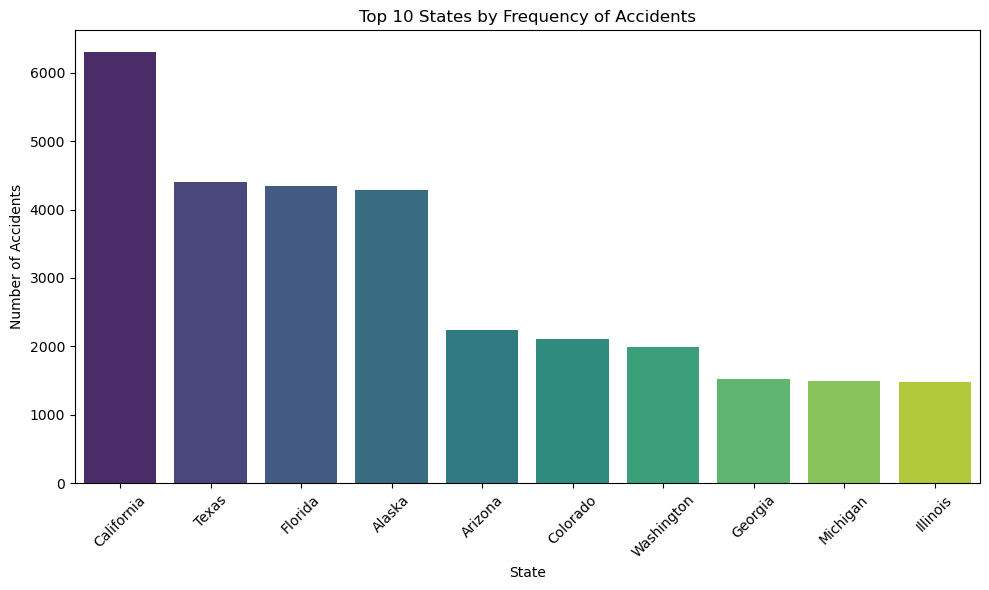

C:\Users\Mary\AppData\Local\Temp\ipykernel_24144\1822993313.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Injury Type', y='Count', data=injury_counts, palette='magma')


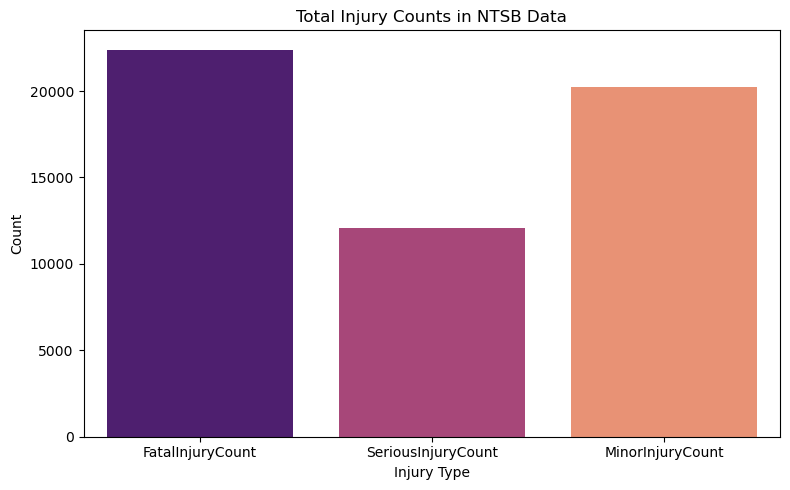


ASRS Data Overview:
             Time             Time.1             Place          Place.1  \
0     ACN    Date  Local Time Of Day  Locale Reference  State Reference   
1  260353  199401          0601-1200               BUF               NY   
2  261253  199401          1801-2400               MBS               MI   
3  261326  199401          1201-1800               FTG               CO   
4  261567  199401          1201-1800               NTD               CA   

                          Place.2                                    Place.3  \
0  Relative Position.Angle.Radial  Relative Position.Distance.Nautical Miles   
1                             272                                        NaN   
2                             NaN                                          3   
3                             NaN                                        NaN   
4                             NaN                                          2   

                     Place.4                   

C:\Users\Mary\AppData\Local\Temp\ipykernel_24144\1822993313.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_issues.index, y=top_issues.values, palette='inferno')


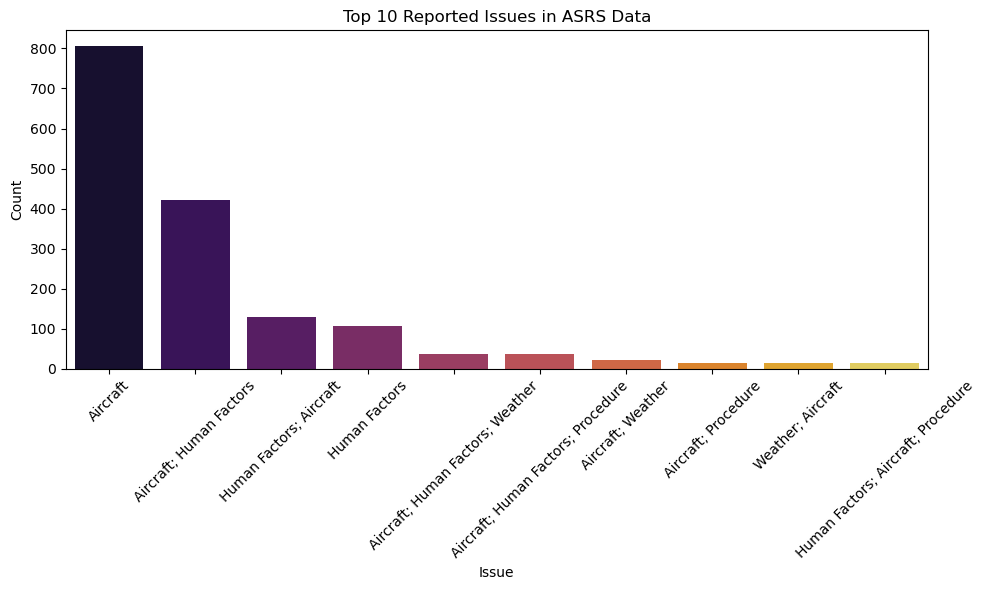

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed NTSB data
ntsb_data = pd.read_csv('../data/processed/ntsb_crash_reports_cleaned.csv', encoding='ISO-8859-1')

# Display the first few rows of the data to check it's loaded correctly
print("NTSB Data Overview:")
print(ntsb_data.head())

# Get basic info about the dataset (e.g., number of rows, columns, missing values)
print("\nNTSB Data Info:")
print(ntsb_data.info())

# Get summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(ntsb_data.describe())

# Check for missing values
print("\nMissing Values in NTSB Data:")
print(ntsb_data.isnull().sum())

# Top 10 States by Frequency of Accidents
state_accidents = ntsb_data['State'].value_counts().head(10)
print("\nTop 10 States by Frequency of Accidents (NTSB Data):")
print(state_accidents)

# Total Injury Counts
total_injuries = ntsb_data[['FatalInjuryCount', 'SeriousInjuryCount', 'MinorInjuryCount']].sum()
print("\nTotal Injury Counts (NTSB Data):")
print(total_injuries)

# Visualize Top 10 States by Frequency of Accidents
plt.figure(figsize=(10, 6))
sns.barplot(x=state_accidents.index, y=state_accidents.values, palette='viridis')
plt.title("Top 10 States by Frequency of Accidents")
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize the Total Injury Counts
injury_counts = total_injuries.reset_index()
injury_counts.columns = ['Injury Type', 'Count']
plt.figure(figsize=(8, 5))
sns.barplot(x='Injury Type', y='Count', data=injury_counts, palette='magma')
plt.title("Total Injury Counts in NTSB Data")
plt.xlabel("Injury Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# For ASRS data, you can load and summarize similarly if you have it cleaned
asrs_data = pd.read_csv('../data/processed/asrs_reports_cleaned.csv')

# Display the first few rows of the ASRS data
print("\nASRS Data Overview:")
print(asrs_data.head())

# Summary statistics for ASRS data
print("\nSummary Statistics for ASRS Data:")
print(asrs_data.describe())

# Check for missing values in ASRS data
print("\nMissing Values in ASRS Data:")
print(asrs_data.isnull().sum())

# Example: Top 10 reported issues in ASRS Data
top_issues = asrs_data['Assessments'].value_counts().head(10)
print("\nTop 10 Reported Issues (ASRS Data):")
print(top_issues)

# Visualize Top 10 Reported Issues in ASRS
plt.figure(figsize=(10, 6))
sns.barplot(x=top_issues.index, y=top_issues.values, palette='inferno')
plt.title("Top 10 Reported Issues in ASRS Data")
plt.xlabel("Issue")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


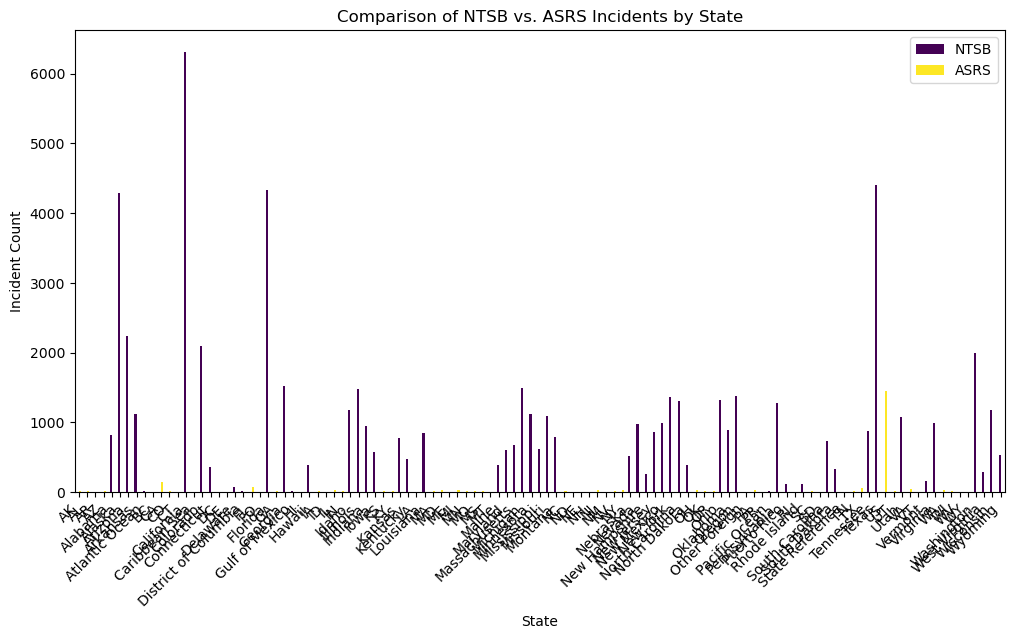

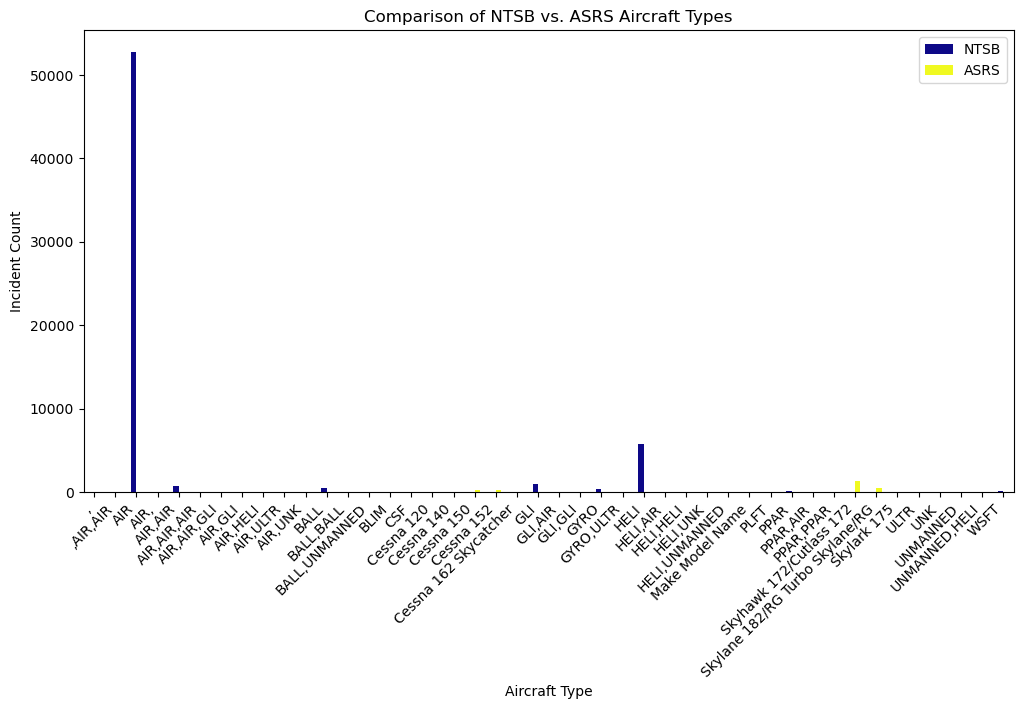

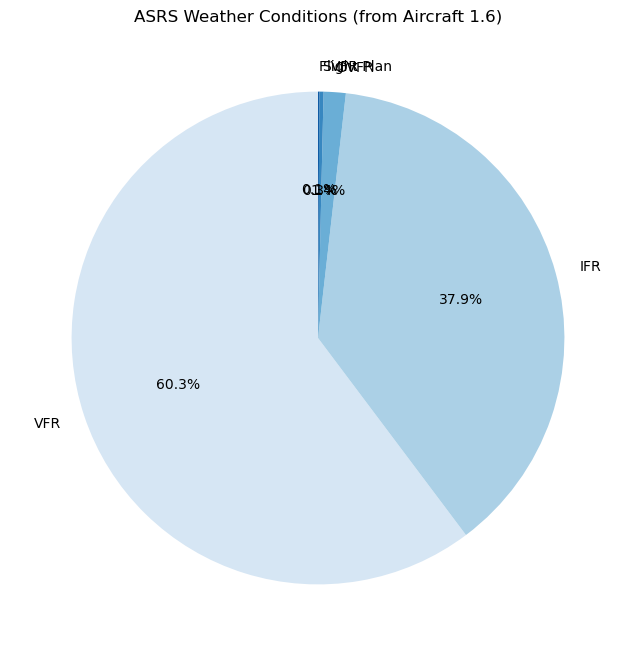

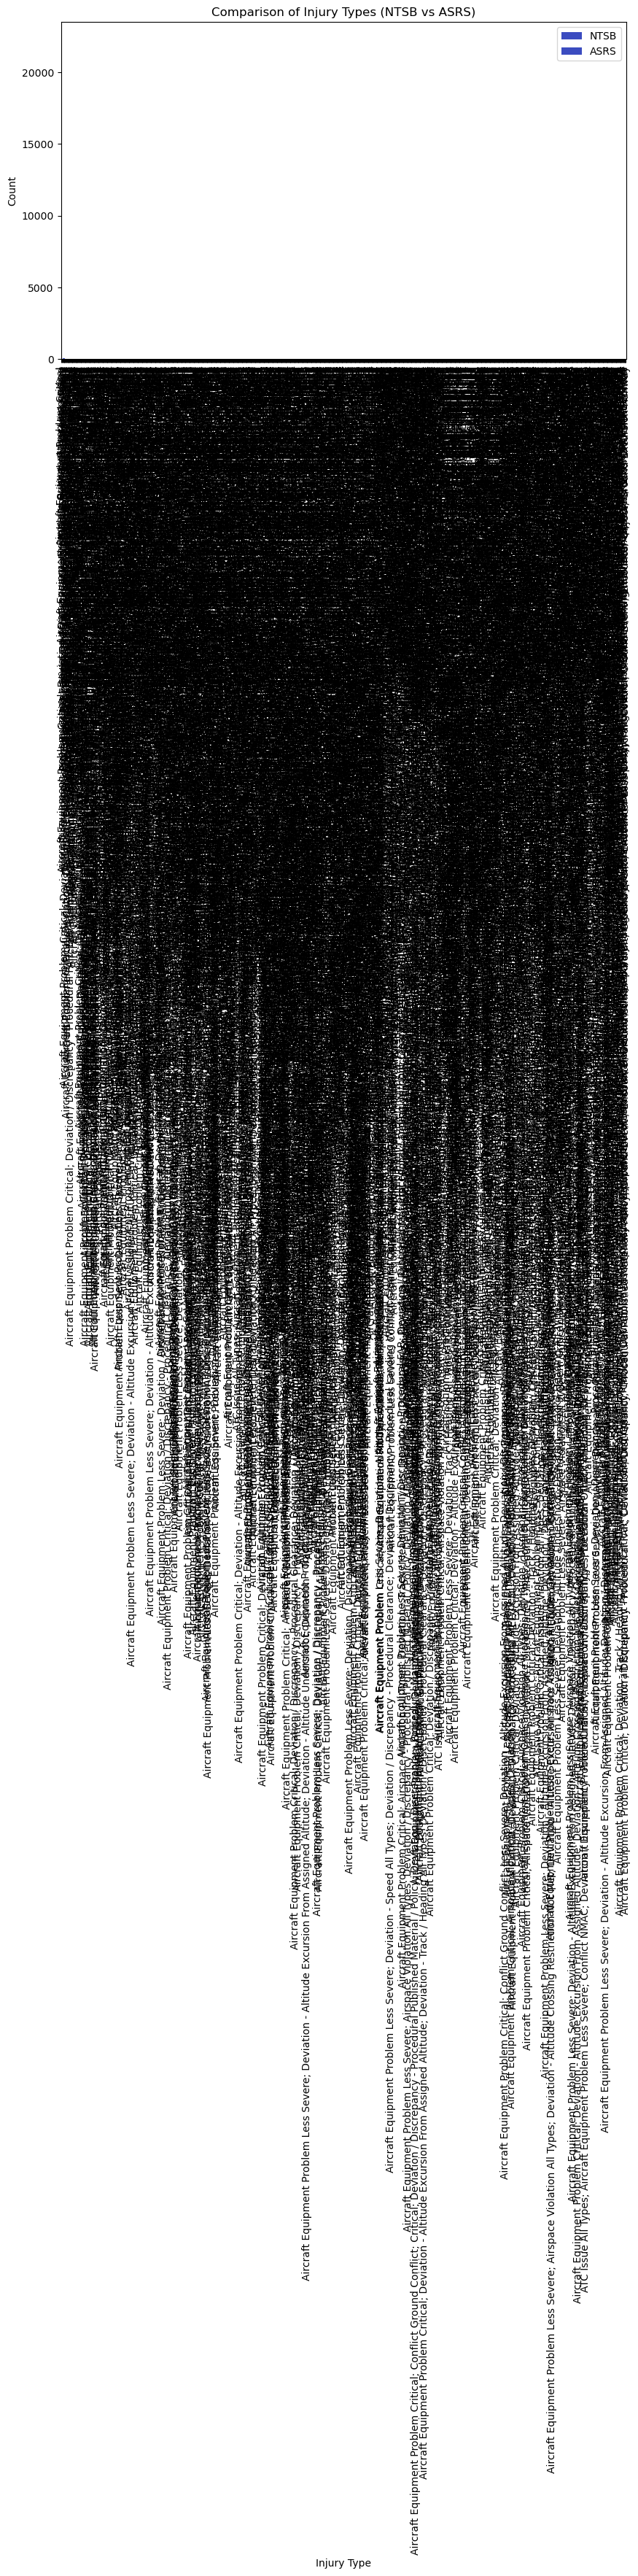

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Merge the NTSB and ASRS datasets on common columns (e.g., State, Aircraft Category, etc.)
merged_data = pd.merge(
    ntsb_data[['State', 'AirCraftCategory']],  # Adjust to available columns in NTSB
    asrs_data[['Place.1', 'Aircraft 1.2', 'Aircraft 1.6']],  # ASRS includes 'Aircraft 1.2' for aircraft types, 'Aircraft 1.6' for weather
    left_on='State', right_on='Place.1', how='outer'
)

# Step 2: Compare Incidents by State (using bar chart)
# Count incidents by state for NTSB and ASRS
ntsb_state_counts = ntsb_data['State'].value_counts()
asrs_state_counts = asrs_data['Place.1'].value_counts()

# Combine the counts into a DataFrame
state_comparison = pd.DataFrame({
    'NTSB': ntsb_state_counts,
    'ASRS': asrs_state_counts
}).fillna(0)

# Plot the comparison by state
state_comparison.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Comparison of NTSB vs. ASRS Incidents by State')
plt.xlabel('State')
plt.ylabel('Incident Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Step 3: Compare Aircraft Types (using bar chart)
# Count aircraft types in NTSB and ASRS
ntsb_aircraft_counts = ntsb_data['AirCraftCategory'].value_counts()
asrs_aircraft_counts = asrs_data['Aircraft 1.2'].value_counts()  # Corrected column name for ASRS aircraft types

# Combine the counts into a DataFrame
aircraft_comparison = pd.DataFrame({
    'NTSB': ntsb_aircraft_counts,
    'ASRS': asrs_aircraft_counts
}).fillna(0)

# Plot the comparison by aircraft type
aircraft_comparison.plot(kind='bar', figsize=(12, 6), colormap='plasma')
plt.title('Comparison of NTSB vs. ASRS Aircraft Types')
plt.xlabel('Aircraft Type')
plt.ylabel('Incident Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Step 4: Weather Condition Comparison (using pie chart for ASRS only)
# Count weather conditions in ASRS (from 'Aircraft 1.6')
asrs_weather_counts = asrs_data['Aircraft 1.6'].value_counts()  # Corrected column for weather conditions in ASRS

# Plot weather condition comparison using pie charts
plt.figure(figsize=(8, 8))
plt.pie(asrs_weather_counts, labels=asrs_weather_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Blues", len(asrs_weather_counts)))
plt.title('ASRS Weather Conditions (from Aircraft 1.6)')
plt.show()

# Step 5: Injury Types Comparison (stacked bar chart)
# For this example, we'll assume 'FatalInjuryCount' and 'SeriousInjuryCount' are key injury types in NTSB
# And we'll assume 'Events' or 'Assessments' might relate to injury types in ASRS
ntsb_injury_counts = ntsb_data[['FatalInjuryCount', 'SeriousInjuryCount', 'MinorInjuryCount']].sum()
asrs_injury_counts = asrs_data['Events'].value_counts()  # Or some other column for ASRS injury types

# Plot comparison
ntsb_injury_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm', label='NTSB')
asrs_injury_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm', label='ASRS')
plt.title('Comparison of Injury Types (NTSB vs ASRS)')
plt.xlabel('Injury Type')
plt.ylabel('Count')
plt.legend()
plt.show()


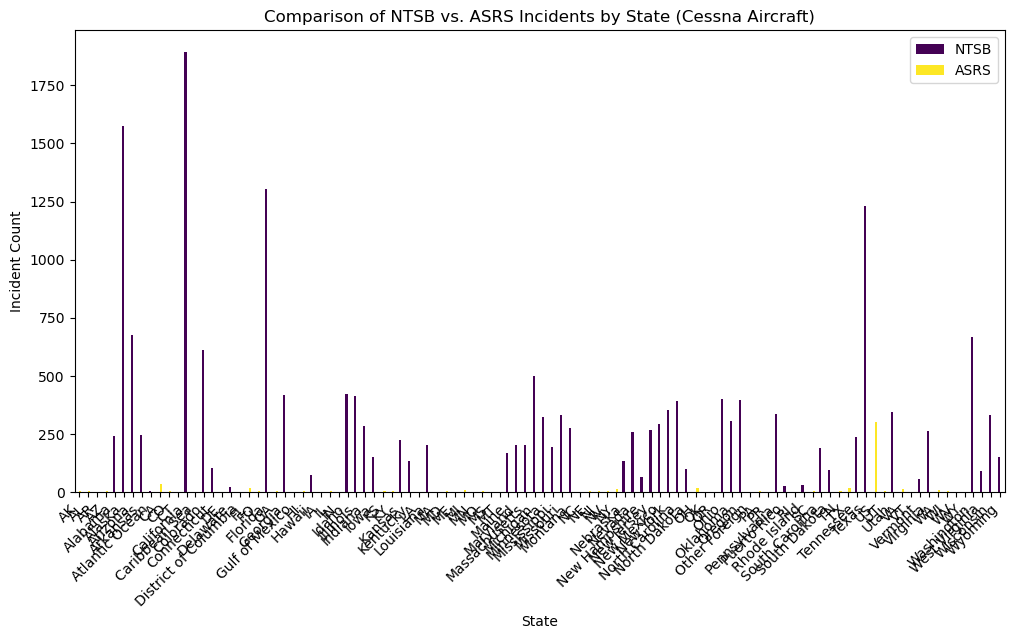

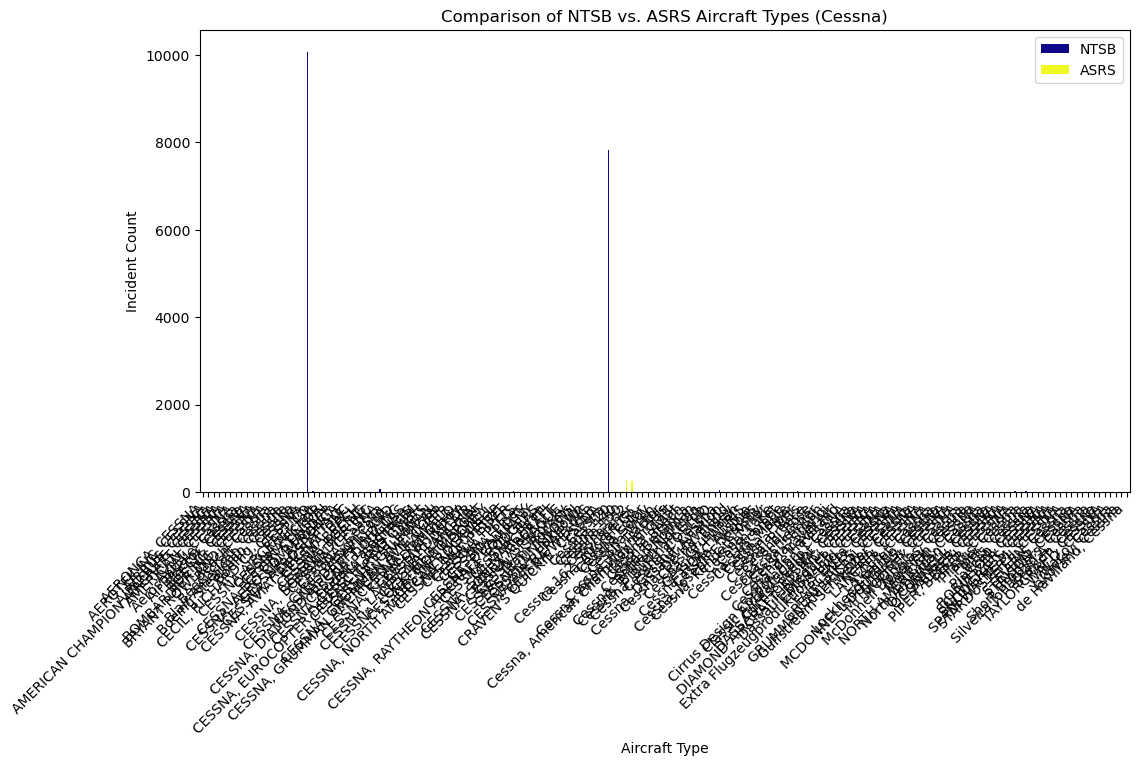

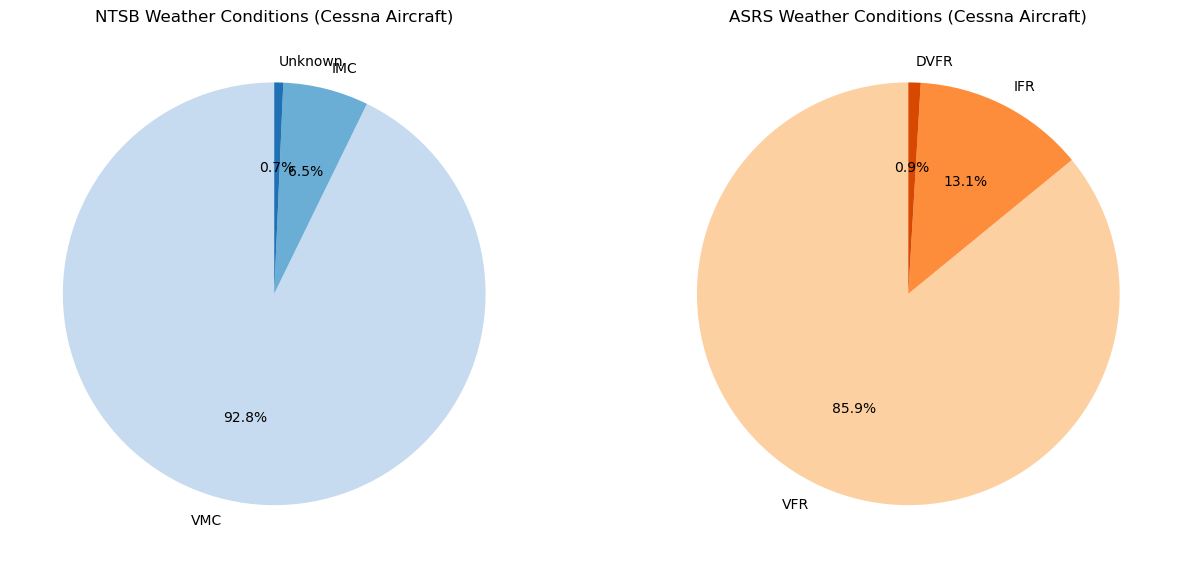

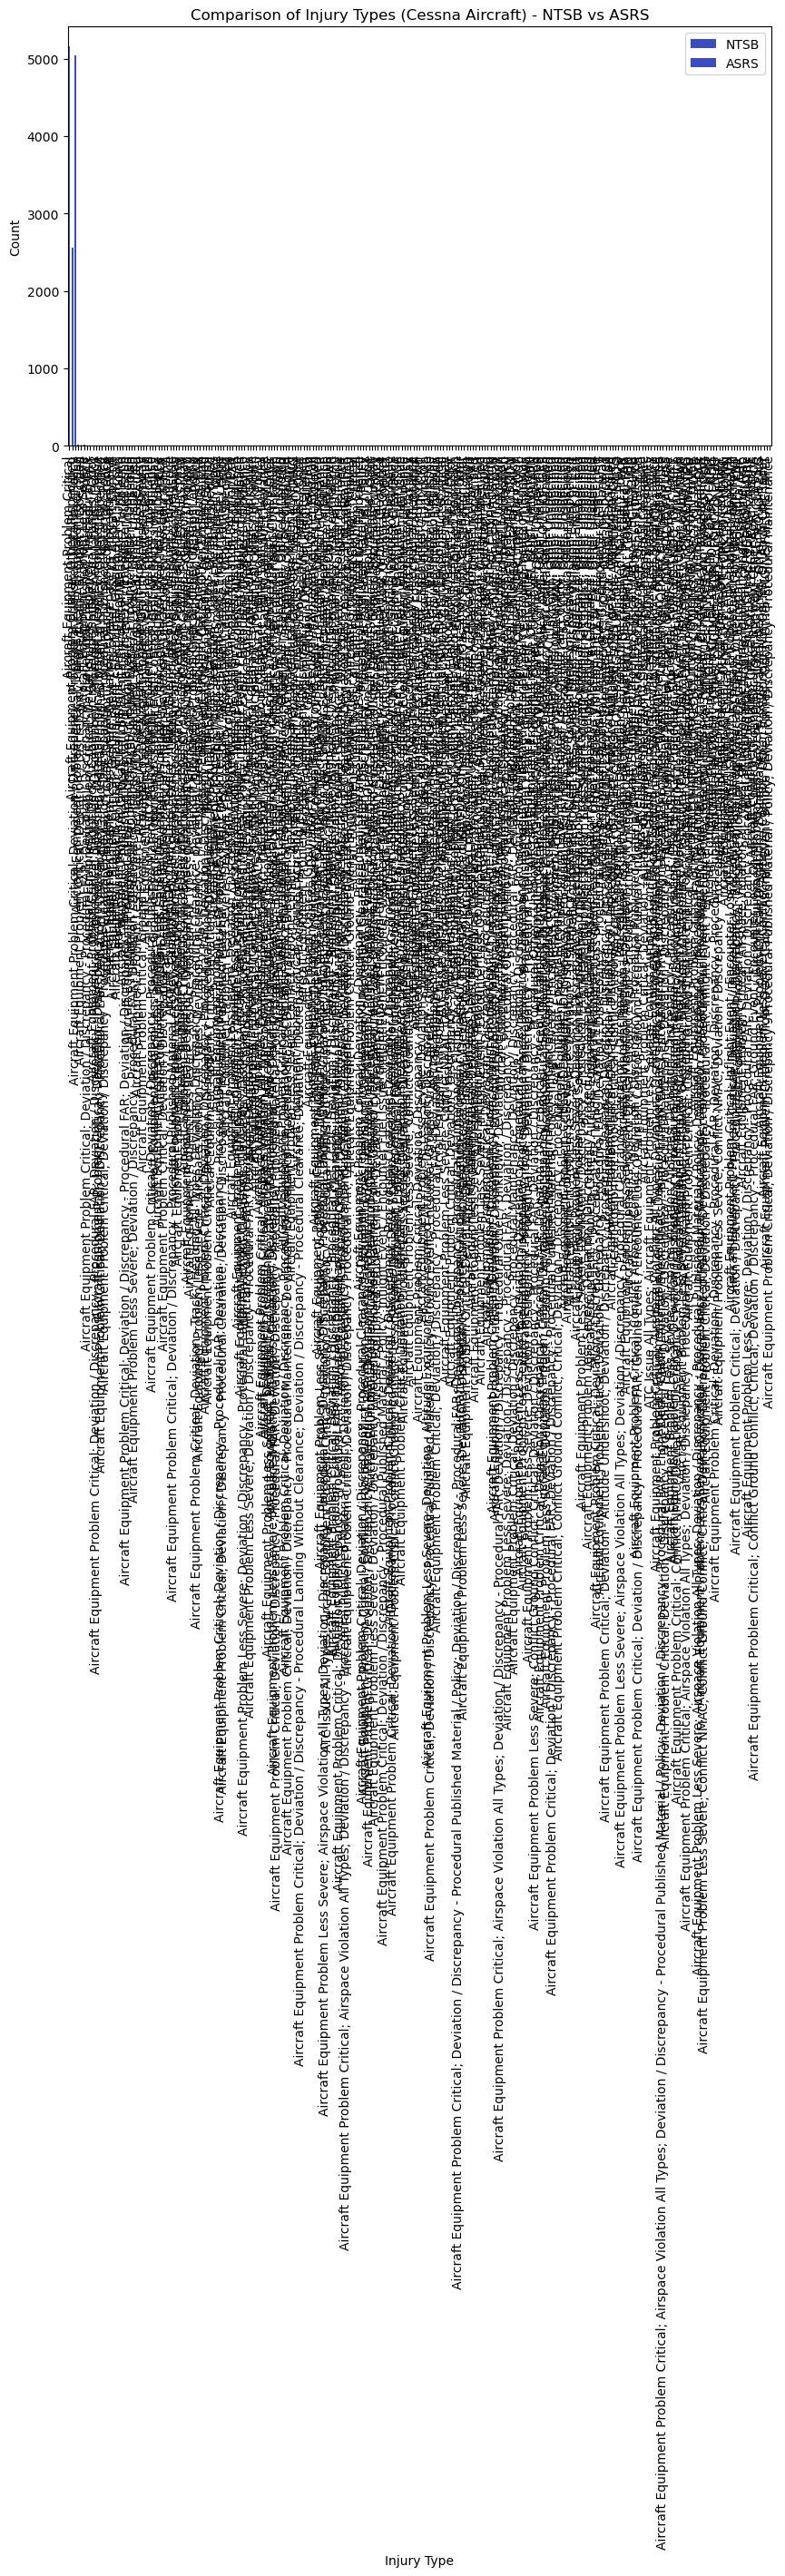

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter NTSB data for Cessna aircraft (using the 'Make' column)
ntsb_cessna_data = ntsb_data[ntsb_data['Make'].str.contains('Cessna', na=False, case=False)]

# Step 2: Filter ASRS data for Cessna aircraft (using 'Aircraft 1.2' column)
asrs_cessna_data = asrs_data[asrs_data['Aircraft 1.2'].str.contains('Cessna', na=False, case=False)]

# Step 3: Compare Incidents by State (using bar chart) for Cessna data
# Count incidents by state for NTSB and ASRS (filtered for Cessna planes)
ntsb_cessna_state_counts = ntsb_cessna_data['State'].value_counts()
asrs_cessna_state_counts = asrs_cessna_data['Place.1'].value_counts()

# Combine the counts into a DataFrame
state_comparison_cessna = pd.DataFrame({
    'NTSB': ntsb_cessna_state_counts,
    'ASRS': asrs_cessna_state_counts
}).fillna(0)

# Plot the comparison by state for Cessna aircraft
state_comparison_cessna.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Comparison of NTSB vs. ASRS Incidents by State (Cessna Aircraft)')
plt.xlabel('State')
plt.ylabel('Incident Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Step 4: Compare Aircraft Types (using bar chart) for Cessna data
# Count aircraft types in NTSB and ASRS (filtered for Cessna planes)
# Since we are filtering by Cessna, this will show the Cessna planes count
ntsb_cessna_aircraft_counts = ntsb_cessna_data['Make'].value_counts()
asrs_cessna_aircraft_counts = asrs_cessna_data['Aircraft 1.2'].value_counts()

# Combine the counts into a DataFrame
aircraft_comparison_cessna = pd.DataFrame({
    'NTSB': ntsb_cessna_aircraft_counts,
    'ASRS': asrs_cessna_aircraft_counts
}).fillna(0)

# Plot the comparison by aircraft type for Cessna planes
aircraft_comparison_cessna.plot(kind='bar', figsize=(12, 6), colormap='plasma')
plt.title('Comparison of NTSB vs. ASRS Aircraft Types (Cessna)')
plt.xlabel('Aircraft Type')
plt.ylabel('Incident Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Step 5: Weather Condition Comparison (using pie chart) for Cessna data
# Count weather conditions in NTSB and ASRS for Cessna aircraft
ntsb_cessna_weather_counts = ntsb_cessna_data['WeatherCondition'].value_counts()
asrs_cessna_weather_counts = asrs_cessna_data['Aircraft 1.6'].value_counts()

# Plot weather condition comparison using pie charts
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# NTSB Weather (filtered for Cessna)
axes[0].pie(ntsb_cessna_weather_counts, labels=ntsb_cessna_weather_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Blues", len(ntsb_cessna_weather_counts)))
axes[0].set_title('NTSB Weather Conditions (Cessna Aircraft)')

# ASRS Weather (filtered for Cessna)
axes[1].pie(asrs_cessna_weather_counts, labels=asrs_cessna_weather_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Oranges", len(asrs_cessna_weather_counts)))
axes[1].set_title('ASRS Weather Conditions (Cessna Aircraft)')

plt.show()

# Step 6: Injury Types Comparison (stacked bar chart) for Cessna data
# For this example, we'll assume 'FatalInjuryCount' and 'SeriousInjuryCount' are key injury types in NTSB
# And we'll assume 'Events' or 'Assessments' might relate to injury types in ASRS
ntsb_cessna_injury_counts = ntsb_cessna_data[['FatalInjuryCount', 'SeriousInjuryCount', 'MinorInjuryCount']].sum()
asrs_cessna_injury_counts = asrs_cessna_data['Events'].value_counts()  # Or some other column for ASRS injury types

# Plot comparison of injury types for Cessna planes
ntsb_cessna_injury_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm', label='NTSB')
asrs_cessna_injury_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm', label='ASRS')
plt.title('Comparison of Injury Types (Cessna Aircraft) - NTSB vs ASRS')
plt.xlabel('Injury Type')
plt.ylabel('Count')
plt.legend()
plt.show()


C:\Users\Mary\AppData\Local\Temp\ipykernel_24144\811957194.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ntsb_cessna_data.loc[:, 'AircraftType'] = ntsb_cessna_data['Make'] + ' ' + ntsb_cessna_data['Model']


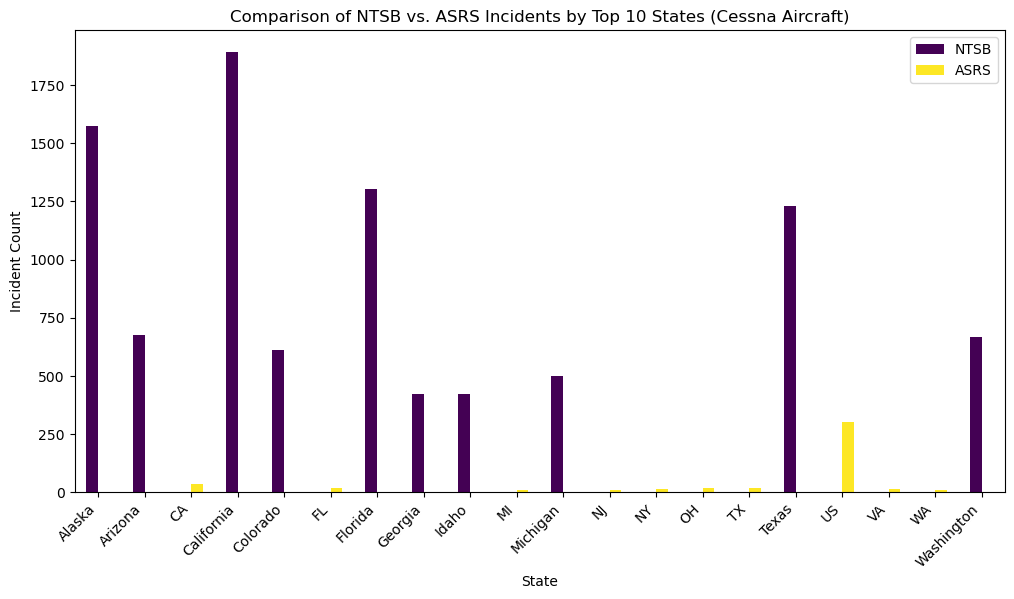

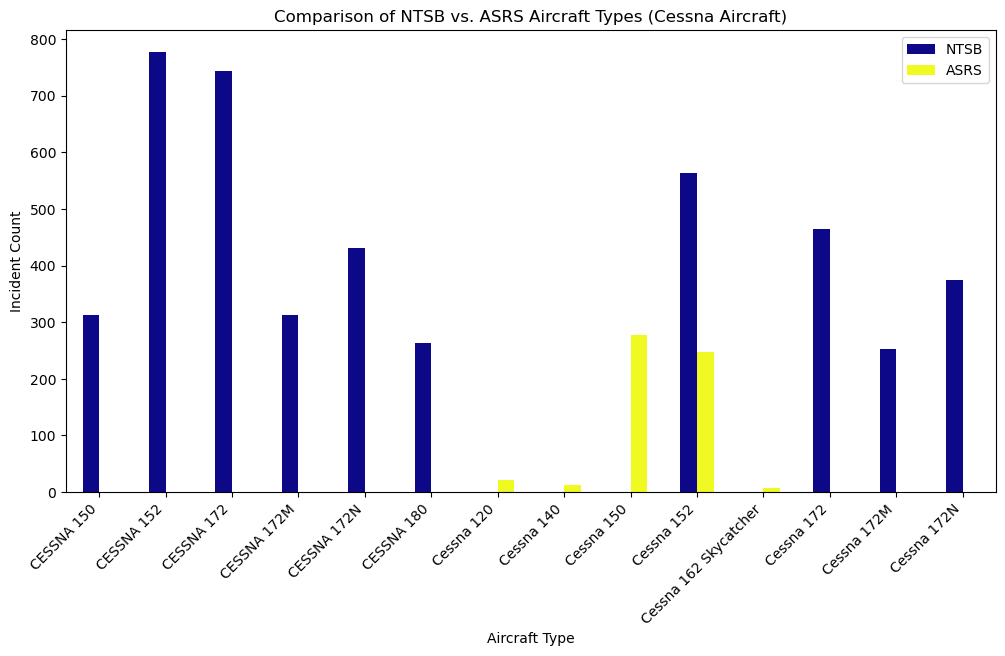

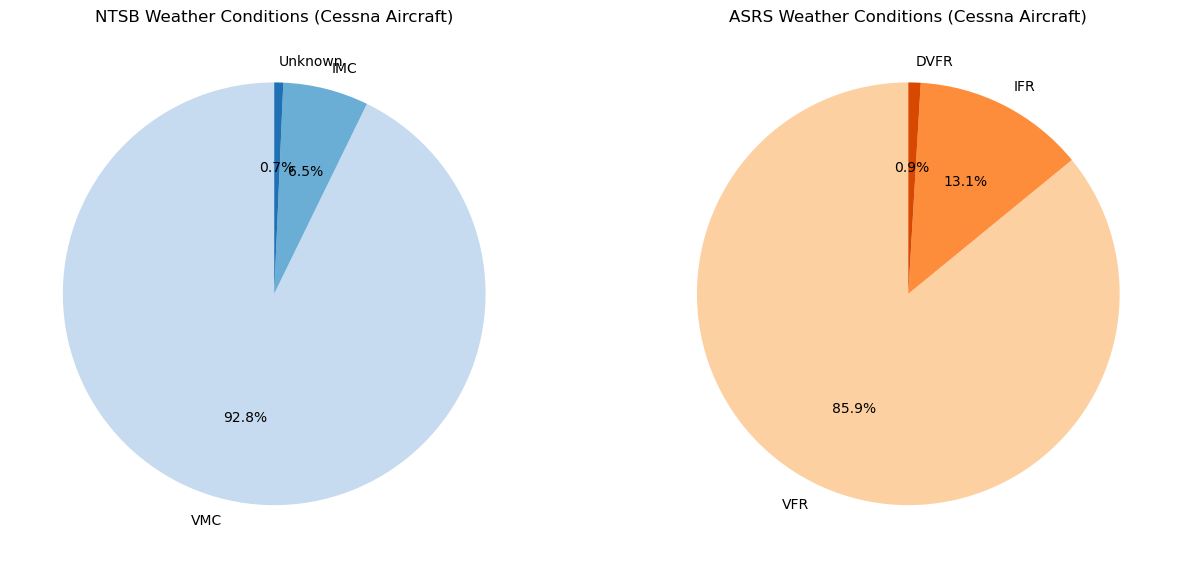

C:\Users\Mary\AppData\Local\Temp\ipykernel_24144\811957194.py:92: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


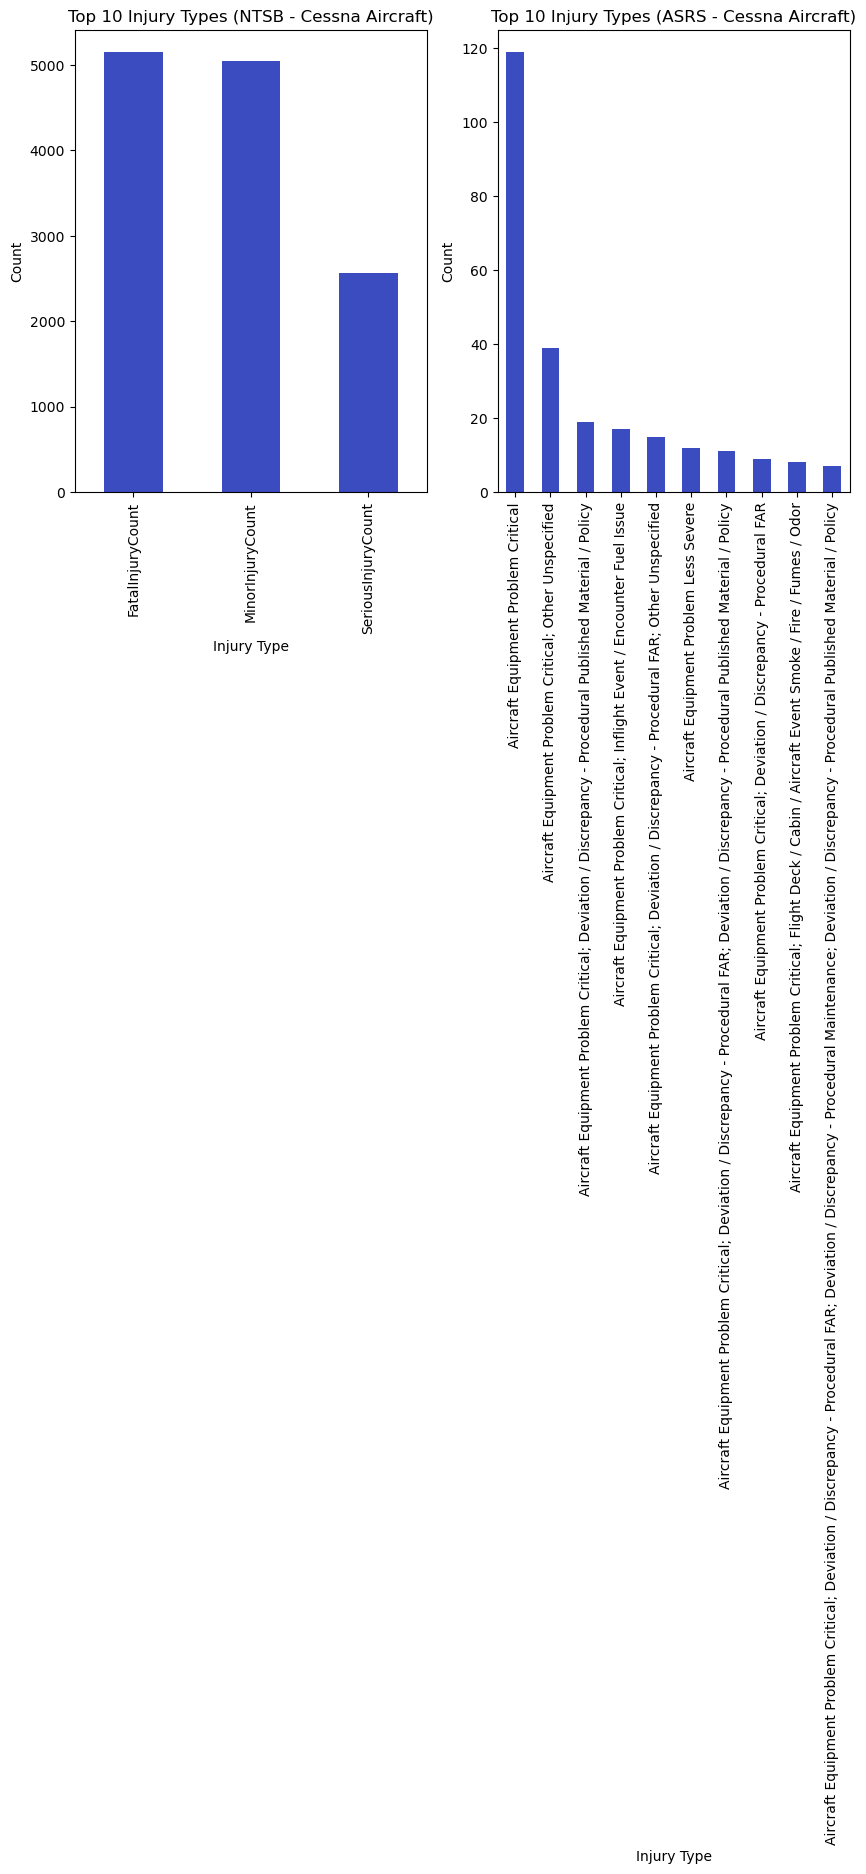

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter NTSB data for all Cessna aircraft (using 'Make' and 'Model' columns)
ntsb_cessna_data = ntsb_data[ntsb_data['Make'].str.contains('Cessna', na=False, case=False)]

# Correctly add 'AircraftType' column to avoid the SettingWithCopyWarning
ntsb_cessna_data.loc[:, 'AircraftType'] = ntsb_cessna_data['Make'] + ' ' + ntsb_cessna_data['Model']

# Step 2: Filter ASRS data for all Cessna aircraft (using 'Aircraft 1.2' column)
asrs_cessna_data = asrs_data[asrs_data['Aircraft 1.2'].str.contains('Cessna', na=False, case=False)]

# Step 3: Compare Incidents by State (using bar chart) for Cessna aircraft
# Count incidents by state for NTSB and ASRS (filtered for Cessna aircraft)
ntsb_cessna_state_counts = ntsb_cessna_data['State'].value_counts().head(10)  # Top 10 states
asrs_cessna_state_counts = asrs_cessna_data['Place.1'].value_counts().head(10)  # Top 10 states

# Combine the counts into a DataFrame
state_comparison_cessna = pd.DataFrame({
    'NTSB': ntsb_cessna_state_counts,
    'ASRS': asrs_cessna_state_counts
}).fillna(0)

# Plot the comparison by state for Cessna aircraft
state_comparison_cessna.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Comparison of NTSB vs. ASRS Incidents by Top 10 States (Cessna Aircraft)')
plt.xlabel('State')
plt.ylabel('Incident Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Step 4: Compare Aircraft Types (using bar chart) for Cessna aircraft
# Count aircraft types in NTSB and ASRS (filtered for Cessna aircraft)
ntsb_cessna_aircraft_counts = ntsb_cessna_data['AircraftType'].value_counts().head(10)  # Top 10 aircraft types
asrs_cessna_aircraft_counts = asrs_cessna_data['Aircraft 1.2'].value_counts().head(10)  # Top 10 aircraft types

# Combine the counts into a DataFrame
aircraft_comparison_cessna = pd.DataFrame({
    'NTSB': ntsb_cessna_aircraft_counts,
    'ASRS': asrs_cessna_aircraft_counts
}).fillna(0)

# Plot the comparison by aircraft type for Cessna aircraft
aircraft_comparison_cessna.plot(kind='bar', figsize=(12, 6), colormap='plasma')
plt.title('Comparison of NTSB vs. ASRS Aircraft Types (Cessna Aircraft)')
plt.xlabel('Aircraft Type')
plt.ylabel('Incident Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Step 5: Weather Condition Comparison (using pie chart) for Cessna aircraft
# Count weather conditions in NTSB and ASRS for Cessna aircraft
ntsb_cessna_weather_counts = ntsb_cessna_data['WeatherCondition'].value_counts().head(10)  # Top 10 weather conditions
asrs_cessna_weather_counts = asrs_cessna_data['Aircraft 1.6'].value_counts().head(10)  # Top 10 weather conditions

# Plot weather condition comparison using pie charts
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# NTSB Weather (filtered for Cessna aircraft)
axes[0].pie(ntsb_cessna_weather_counts, labels=ntsb_cessna_weather_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Blues", len(ntsb_cessna_weather_counts)))
axes[0].set_title('NTSB Weather Conditions (Cessna Aircraft)')

# ASRS Weather (filtered for Cessna aircraft)
axes[1].pie(asrs_cessna_weather_counts, labels=asrs_cessna_weather_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Oranges", len(asrs_cessna_weather_counts)))
axes[1].set_title('ASRS Weather Conditions (Cessna Aircraft)')

plt.show()

# Step 6: Injury Types Comparison (stacked bar chart) for Top 5-10 injury types and Cessna aircraft
# For NTSB, get top 10 injury types by counting occurrences in the 'FatalInjuryCount', 'SeriousInjuryCount', 'MinorInjuryCount'
ntsb_cessna_injury_counts = ntsb_cessna_data[['FatalInjuryCount', 'SeriousInjuryCount', 'MinorInjuryCount']].sum().sort_values(ascending=False).head(10)

# For ASRS, we will look at the 'Events' column and count the most common injury-related events
asrs_cessna_injury_counts = asrs_cessna_data['Events'].value_counts().head(10)  # Top 10 events

# Plot comparison of injury types for Top 10 injury types (stacked) and Cessna aircraft
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# NTSB injury types (Top 10)
ntsb_cessna_injury_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm', ax=axes[0], label='NTSB')
axes[0].set_title('Top 10 Injury Types (NTSB - Cessna Aircraft)')
axes[0].set_xlabel('Injury Type')
axes[0].set_ylabel('Count')

# ASRS injury types (Top 10)
asrs_cessna_injury_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm', ax=axes[1], label='ASRS')
axes[1].set_title('Top 10 Injury Types (ASRS - Cessna Aircraft)')
axes[1].set_xlabel('Injury Type')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [44]:
import pandas as pd

# Assuming ntsb_data is already loaded into your DataFrame

# Step 1: Filter for only Cessna planes (where Make is 'Cessna')
cessna_data = ntsb_data[ntsb_data['Make'] == 'Cessna']

# Combine Make and Model to get the full aircraft type
cessna_data['AircraftType'] = cessna_data['Make'] + ' ' + cessna_data['Model']

# Step 2: Count Crashes by State for Cessna planes
state_crash_counts = cessna_data['State'].value_counts()

# Get top 10 states with the most Cessna crashes
top_10_states = state_crash_counts.head(10)

# Step 3: Initialize a dictionary to store the results
state_aircraft_counts = {}

# Step 4: Loop over each of the top 10 states
for state in top_10_states.index:
    # Filter the data for each state
    state_data = cessna_data[cessna_data['State'] == state]
    
    # Count the occurrences of each Cessna aircraft that crashed in this state
    aircraft_counts = state_data['AircraftType'].value_counts().head(5)  # Top 5 Cessna aircraft
    
    # Store the result for each state
    state_aircraft_counts[state] = aircraft_counts

# Step 5: Display the result
for state, aircraft_counts in state_aircraft_counts.items():
    print(f"Top Cessna Aircrafts Crashed in {state}:")
    print(aircraft_counts)
    print()  # Add a blank line for separation


Top Cessna Aircrafts Crashed in California:
AircraftType
Cessna 152     71
Cessna 172N    57
Cessna 172     27
Cessna 172M    25
Cessna 172S    23
Name: count, dtype: int64

Top Cessna Aircrafts Crashed in Alaska:
AircraftType
Cessna 180     78
Cessna 185     73
Cessna 207     55
Cessna 170B    49
Cessna 172     48
Name: count, dtype: int64

Top Cessna Aircrafts Crashed in Florida:
AircraftType
Cessna 152     88
Cessna 172     38
Cessna 172S    29
Cessna 172N    26
Cessna 172P    22
Name: count, dtype: int64

Top Cessna Aircrafts Crashed in Texas:
AircraftType
Cessna 152     55
Cessna 172     34
Cessna 172N    25
Cessna 172M    19
Cessna 172P    15
Name: count, dtype: int64

Top Cessna Aircrafts Crashed in Arizona:
AircraftType
Cessna 152     21
Cessna 172N    21
Cessna 172     20
Cessna 172S    17
Cessna 172M    12
Name: count, dtype: int64

Top Cessna Aircrafts Crashed in Washington:
AircraftType
Cessna 152     14
Cessna 172N    14
Cessna 172P    14
Cessna 172M    12
Cessna 172     1

C:\Users\Mary\AppData\Local\Temp\ipykernel_24144\4092473789.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cessna_data['AircraftType'] = cessna_data['Make'] + ' ' + cessna_data['Model']


In [60]:
import pandas as pd

# Assuming ntsb_data is already loaded into your DataFrame

# Step 1: Filter for only Cessna planes (where Make is 'Cessna')
cessna_data = ntsb_data[ntsb_data['Make'] == 'Cessna']

# Combine Make and Model to get the full aircraft type (e.g., Cessna 172)
cessna_data['AircraftType'] = cessna_data['Make'] + ' ' + cessna_data['Model']

# Step 2: Count Crashes by State for Cessna planes
state_crash_counts = cessna_data['State'].value_counts()

# Get top 10 states with the most Cessna crashes
top_10_states = state_crash_counts.head(10)

# Step 3: Initialize a dictionary to store the results
state_aircraft_counts = {}

# Step 4: Loop over each of the top 10 states
for state in top_10_states.index:
    # Filter the data for each state
    state_data = cessna_data[cessna_data['State'] == state]
    
    # Count the occurrences of each Cessna aircraft that crashed in this state
    aircraft_counts = state_data['AircraftType'].value_counts().head(5)  # Top 5 Cessna aircraft
    
    # Step 5: Initialize a dictionary to store the most common cause for each aircraft
    aircraft_causes = {}
    aircraft_cause_counts = {}  # To store the count of the most common cause for each aircraft
    
    # For each Cessna aircraft type, get the most common probable cause in that state
    for aircraft in aircraft_counts.index:
        aircraft_data = state_data[state_data['AircraftType'] == aircraft]
        cause_counts = aircraft_data['ProbableCause'].value_counts()
        most_common_cause = cause_counts.idxmax() if not cause_counts.empty else 'Unknown'
        
        # Store the most common cause for this aircraft and its count
        aircraft_causes[aircraft] = most_common_cause
        aircraft_cause_counts[aircraft] = cause_counts.max() if not cause_counts.empty else 0

    # Store the result for each state
    state_aircraft_counts[state] = {
        'aircraft_counts': aircraft_counts,
        'aircraft_causes': aircraft_causes,
        'aircraft_cause_counts': aircraft_cause_counts
    }

# Step 6: Display the result with improved readability
for state, data in state_aircraft_counts.items():
    print(f"\nTop 5 Cessna Aircrafts Crashed in {state}:")
    print("-" * 120)
    print(f"{'Aircraft Type':<35} {'Crash Count':<15} {'Most Common Cause':<60} {'Cause Count'}")
    print("-" * 120)
    
    for aircraft, count in data['aircraft_counts'].items():
        most_common_cause = data['aircraft_causes'][aircraft]
        cause_count = data['aircraft_cause_counts'][aircraft]
        
        # Print the result with no truncation of cause text
        print(f"{aircraft:<35} {count:<15} {most_common_cause:<60} {cause_count}")
    
    print("-" * 120)  # Line break between states



Top 5 Cessna Aircrafts Crashed in California:
------------------------------------------------------------------------------------------------------------------------
Aircraft Type                       Crash Count     Most Common Cause                                            Cause Count
------------------------------------------------------------------------------------------------------------------------
Cessna 152                          71              The pilot's misjudged landing flare, which resulted in a hard landing. 2
Cessna 172N                         57              The loss of engine power due to carburetor ice resulting from the flight instructor's failure to use the carburetor heat when simulating an engine failure.  Contributing to the accident were the carburetor icing weather condition and the lack of suitable terrain for the forced landing. 1
Cessna 172                          27              The student pilot's failure to maintain airplane control when the ai

C:\Users\Mary\AppData\Local\Temp\ipykernel_24144\1660266889.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cessna_data['AircraftType'] = cessna_data['Make'] + ' ' + cessna_data['Model']


In [64]:
import pandas as pd

# Assuming ntsb_data is already loaded into your DataFrame

# Step 1: Filter for only Cessna planes (where Make is 'Cessna')
cessna_data = ntsb_data[ntsb_data['Make'] == 'Cessna']

# Combine Make and Model to get the full aircraft type (e.g., Cessna 172)
cessna_data['AircraftType'] = cessna_data['Make'] + ' ' + cessna_data['Model']

# Step 2: Count Crashes by State for Cessna planes
state_crash_counts = cessna_data['State'].value_counts()

# Get top 10 states with the most Cessna crashes
top_10_states = state_crash_counts.head(10)

# Step 3: Initialize a dictionary to store the results
state_aircraft_counts = {}

# Step 4: Loop over each of the top 10 states
for state in top_10_states.index:
    # Filter the data for each state
    state_data = cessna_data[cessna_data['State'] == state]
    
    # Count the occurrences of each Cessna aircraft that crashed in this state
    aircraft_counts = state_data['AircraftType'].value_counts().head(5)  # Top 5 Cessna aircraft
    
    # Step 5: Initialize a dictionary to store the most common cause for each aircraft
    aircraft_causes = {}
    aircraft_cause_counts = {}  # To store the count of the most common cause for each aircraft
    
    # For each Cessna aircraft type, get the most common probable cause in that state
    for aircraft in aircraft_counts.index:
        aircraft_data = state_data[state_data['AircraftType'] == aircraft]
        cause_counts = aircraft_data['ProbableCause'].value_counts()
        most_common_cause = cause_counts.idxmax() if not cause_counts.empty else 'Unknown'
        
        # Store the most common cause for this aircraft and its count
        aircraft_causes[aircraft] = most_common_cause
        aircraft_cause_counts[aircraft] = cause_counts.max() if not cause_counts.empty else 0

    # Store the result for each state
    state_aircraft_counts[state] = {
        'aircraft_counts': aircraft_counts,
        'aircraft_causes': aircraft_causes,
        'aircraft_cause_counts': aircraft_cause_counts
    }

# Step 6: Display the result with improved readability, truncating long causes
max_cause_length = 30  # Maximum length for the most common cause

for state, data in state_aircraft_counts.items():
    print(f"\nTop 5 Cessna Aircrafts Crashed in {state}:")
    print("-" * 80)
    print(f"{'Aircraft Type':<25} {'Crash Count':<15} {'Most Common Cause':<35} {'Cause Count'}")
    print("-" * 80)
    
    for aircraft, count in data['aircraft_counts'].items():
        most_common_cause = data['aircraft_causes'][aircraft]
        cause_count = data['aircraft_cause_counts'][aircraft]
        
        # Truncate the cause if it's too long
        if len(most_common_cause) > max_cause_length:
            most_common_cause = most_common_cause[:max_cause_length] + "..."
        
        print(f"{aircraft:<25} {count:<15} {most_common_cause:<35} {cause_count}")
    
    print("-" * 80)  # Line break between states



Top 5 Cessna Aircrafts Crashed in California:
--------------------------------------------------------------------------------
Aircraft Type             Crash Count     Most Common Cause                   Cause Count
--------------------------------------------------------------------------------
Cessna 152                71              The pilot's misjudged landing ...   2
Cessna 172N               57              The loss of engine power due t...   1
Cessna 172                27              The student pilot's failure to...   1
Cessna 172M               25              A loss of engine power due to ...   1
Cessna 172S               23              The pilot's decision not to us...   1
--------------------------------------------------------------------------------

Top 5 Cessna Aircrafts Crashed in Alaska:
--------------------------------------------------------------------------------
Aircraft Type             Crash Count     Most Common Cause                   Cause Count
------

C:\Users\Mary\AppData\Local\Temp\ipykernel_24144\4190588795.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cessna_data['AircraftType'] = cessna_data['Make'] + ' ' + cessna_data['Model']


In [66]:
import pandas as pd

# Assuming ntsb_data is already loaded into your DataFrame

# Step 1: Filter for only Cessna planes (where Make is 'Cessna')
cessna_data = ntsb_data[ntsb_data['Make'] == 'Cessna']

# Combine Make and Model to get the full aircraft type (e.g., Cessna 172)
cessna_data['AircraftType'] = cessna_data['Make'] + ' ' + cessna_data['Model']

# Step 2: Count the total accidents for each Cessna aircraft type (Make and Model)
aircraft_counts = cessna_data['AircraftType'].value_counts()

# Step 3: Initialize a dictionary to store the most common cause for each aircraft type
aircraft_causes = {}
aircraft_cause_counts = {}  # To store the count of the most common cause for each aircraft type

# For each Cessna aircraft type, get the most common probable cause
for aircraft in aircraft_counts.index:
    aircraft_data = cessna_data[cessna_data['AircraftType'] == aircraft]
    cause_counts = aircraft_data['ProbableCause'].value_counts()
    most_common_cause = cause_counts.idxmax() if not cause_counts.empty else 'Unknown'
    
    # Store the most common cause for this aircraft and its count
    aircraft_causes[aircraft] = most_common_cause
    aircraft_cause_counts[aircraft] = cause_counts.max() if not cause_counts.empty else 0

# Step 4: Display the result with improved readability
print(f"{'Aircraft Type':<35} {'Accident Count':<15} {'Most Common Cause':<60} {'Cause Count'}")
print("-" * 120)

for aircraft, count in aircraft_counts.items():
    most_common_cause = aircraft_causes[aircraft]
    cause_count = aircraft_cause_counts[aircraft]
    
    # Print the result with no truncation of cause text
    print(f"{aircraft:<35} {count:<15} {most_common_cause:<60} {cause_count}")
    
print("-" * 120)  # Line break at the end


C:\Users\Mary\AppData\Local\Temp\ipykernel_24144\3084232766.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cessna_data['AircraftType'] = cessna_data['Make'] + ' ' + cessna_data['Model']


Aircraft Type                       Accident Count  Most Common Cause                                            Cause Count
------------------------------------------------------------------------------------------------------------------------
Cessna 152                          563             The student pilot's improper recovery from a bounced landing. 3
Cessna 172                          465             The pilot's improper flare, which resulted in a hard landing. 3
Cessna 172N                         374             The pilot's inadequate recovery from a bounced landing.      2
Cessna 172M                         253             A loss of engine power for undetermined reasons.             2
Cessna 172P                         221             A loss of engine power for undetermined reasons.             2
Cessna 180                          202             The pilot's failure to maintain directional control during landing. 2
Cessna 182                          185             The

In [68]:
import pandas as pd

# Assuming ntsb_data is already loaded into your DataFrame

# Step 1: Filter for only Cessna planes (where Make is 'Cessna')
cessna_data = ntsb_data[ntsb_data['Make'] == 'Cessna']

# Combine Make and Model to get the full aircraft type (e.g., Cessna 172)
cessna_data['AircraftType'] = cessna_data['Make'] + ' ' + cessna_data['Model']

# Step 2: Count the total accidents for each Cessna aircraft type (Make and Model)
aircraft_counts = cessna_data['AircraftType'].value_counts()

# Step 3: Initialize a dictionary to store the most common cause for each aircraft type
aircraft_causes = {}
aircraft_cause_counts = {}  # To store the count of the most common cause for each aircraft type

# For each Cessna aircraft type, get the most common probable cause
for aircraft in aircraft_counts.index:
    aircraft_data = cessna_data[cessna_data['AircraftType'] == aircraft]
    cause_counts = aircraft_data['ProbableCause'].value_counts()
    most_common_cause = cause_counts.idxmax() if not cause_counts.empty else 'Unknown'
    
    # Store the most common cause for this aircraft and its count
    aircraft_causes[aircraft] = most_common_cause
    aircraft_cause_counts[aircraft] = cause_counts.max() if not cause_counts.empty else 0

# Step 4: Display the result with improved readability and preventing line breaks
print(f"{'Aircraft Type':<35} {'Accident Count':<15} {'Most Common Cause':<70} {'Cause Count'}")
print("-" * 120)

# Set a maximum length for the cause to prevent it from going onto the next line
max_cause_length = 70

for aircraft, count in aircraft_counts.items():
    most_common_cause = aircraft_causes[aircraft]
    cause_count = aircraft_cause_counts[aircraft]
    
    # Truncate the cause to fit within the specified width
    if len(most_common_cause) > max_cause_length:
        most_common_cause = most_common_cause[:max_cause_length] + "..."
    
    # Print the result with no truncation of cause text
    print(f"{aircraft:<35} {count:<15} {most_common_cause:<70} {cause_count}")

print("-" * 120)  # Line break at the end


C:\Users\Mary\AppData\Local\Temp\ipykernel_24144\3697972505.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cessna_data['AircraftType'] = cessna_data['Make'] + ' ' + cessna_data['Model']


Aircraft Type                       Accident Count  Most Common Cause                                                      Cause Count
------------------------------------------------------------------------------------------------------------------------
Cessna 152                          563             The student pilot's improper recovery from a bounced landing.          3
Cessna 172                          465             The pilot's improper flare, which resulted in a hard landing.          3
Cessna 172N                         374             The pilot's inadequate recovery from a bounced landing.                2
Cessna 172M                         253             A loss of engine power for undetermined reasons.                       2
Cessna 172P                         221             A loss of engine power for undetermined reasons.                       2
Cessna 180                          202             The pilot's failure to maintain directional control during landing.

In [72]:
import pandas as pd

# Assuming ntsb_data is already loaded into your DataFrame

# Step 1: Filter for only Cessna planes (where Make is 'Cessna')
cessna_data = ntsb_data[ntsb_data['Make'] == 'Cessna']

# Step 2: Get the counts of each probable cause for Cessna planes
cause_counts = cessna_data['ProbableCause'].value_counts()

# Step 3: Get the top 10 most common causes and their counts
top_10_causes = cause_counts.head(10)

# Step 4: Display the top 10 causes and their counts
print("Top 10 Most Common Causes for Cessna Aircraft Crashes:")
for cause, count in top_10_causes.items():
    print(f"{cause}: {count}")


Top 10 Most Common Causes for Cessna Aircraft Crashes:
A loss of engine power for undetermined reasons.: 18
The pilot's improper recovery from a bounced landing.: 14
The loss of engine power for undetermined reasons.: 14
The student pilot's improper recovery from a bounced landing.: 12
The loss of engine power for undetermined reasons.  A contributing factor was the lack of suitable terrain for the forced landing.: 12
The pilot's failure to maintain directional control.: 11
The pilot's failure to maintain directional control during the landing roll.: 11
The pilot's failure to maintain directional control during landing.: 10
The pilot's improper flare.: 8
The pilot's improper flare and improper recovery from a bounced landing.: 7


C:\Users\Mary\AppData\Local\Temp\ipykernel_24144\245216421.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cessna_data['CauseCategory'] = cessna_data['ProbableCause'].apply(categorize_cause)


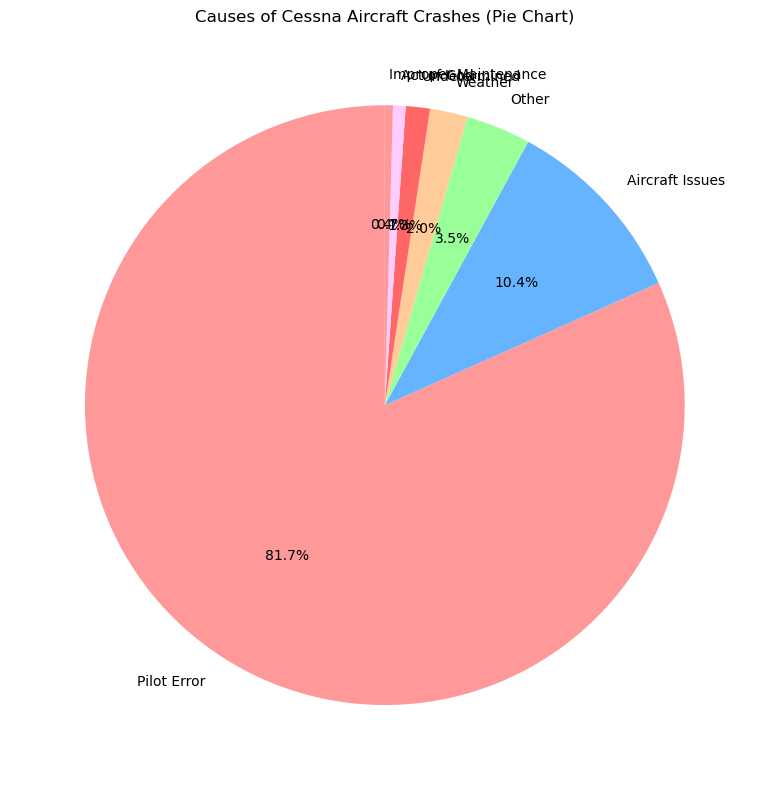

C:\Users\Mary\AppData\Local\Temp\ipykernel_24144\245216421.py:77: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = (cause_category_counts[i] / total_crashes) * 100
C:\Users\Mary\AppData\Local\Temp\ipykernel_24144\245216421.py:78: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, cause_category_counts[i] + 0.2, f'{percentage:.1f}%', ha='center', va='bottom')


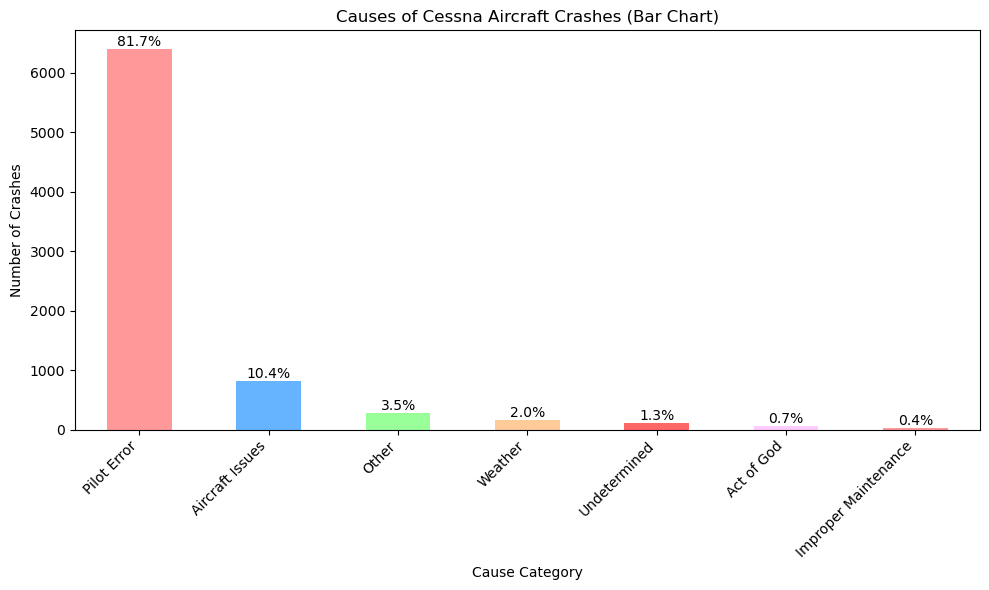

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming ntsb_data is already loaded into your DataFrame
# Filter for only Cessna planes (where Make is 'Cessna')
cessna_data = ntsb_data[ntsb_data['Make'] == 'Cessna']

# Step 1: Define the categories for the causes with additional keywords
def categorize_cause(cause):
    # Define lists of keywords to categorize causes into Pilot Error, Aircraft Issues, or Weather
    pilot_error_keywords = [
        'pilot', 'human error', 'misjudgment', 'inexperience', 'suicide', 'person', 'misjudged', 
        'error', 'untrained', 'unqualified', 'failure to', 'lost control', 'disorientation',
        'improper handling', 'inattention', 'overloaded', 'poor judgment', 'failure to maintain control'
    ]
    aircraft_keywords = [
        'mechanical failure', 'engine failure', 'fuel exhaustion', 'landing gear failure', 
        'bird strike', 'engine', 'collapse', 'leak', 'system failure', 'flap failure', 
        'brake failure', 'electrical failure', 'fuel leak', 'malfunction', 'worn parts', 'defective', 
        'shortage', 'tailpipe', 'propeller', 'instrument failure'
    ]
    weather_keywords = [
        'weather', 'turbulence', 'fog', 'thunderstorm', 'wind', 'hail', 'lightning', 'rain', 
        'freezing', 'blizzard', 'icing', 'visibility', 'clouds', 'snow', 'heavy rain', 'windshear', 
        'microburst', 'temperature', 'precipitation', 'gusty winds'
    ]
    maintenance_keywords = [
        'maintenance', 'service', 'repair', 'inspection', 'deficient maintenance', 'improper servicing',
        'failure to inspect', 'maintenance oversight', 'poor maintenance', 'maintenance error', 
        'service failure'
    ]
    undetermined_keywords = ['undetermined', 'unknown', 'unexplained', 'no cause', 'none identified']
    act_of_god_keywords = [
        'bird', 'deer', 'animal', 'volcanic eruption', 'earthquake', 'tornado', 'flood', 
        'storm', 'hurricane', 'lightning', 'meteorological', 'acts of god', 'uncontrollable weather'
    ]
    
    cause = str(cause).lower()

    # Categorize the cause based on keywords
    if any(keyword in cause for keyword in pilot_error_keywords):
        return 'Pilot Error'
    elif any(keyword in cause for keyword in aircraft_keywords):
        return 'Aircraft Issues'
    elif any(keyword in cause for keyword in weather_keywords):
        return 'Weather'
    elif any(keyword in cause for keyword in undetermined_keywords):
        return 'Undetermined' 
    elif any(keyword in cause for keyword in maintenance_keywords):
        return 'Improper Maintenance'
    elif any(keyword in cause for keyword in act_of_god_keywords):
        return 'Act of God'    
    else:
        return 'Other'

# Step 2: Apply the categorization to the 'ProbableCause' column
cessna_data['CauseCategory'] = cessna_data['ProbableCause'].apply(categorize_cause)

# Step 3: Count the number of occurrences in each category
cause_category_counts = cessna_data['CauseCategory'].value_counts()

# Step 4: Plot the pie chart
plt.figure(figsize=(8, 8))
cause_category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99', '#ff6666', '#ffccff'])
plt.title("Causes of Cessna Aircraft Crashes (Pie Chart)")
plt.ylabel('')  # Hide the y-label
plt.tight_layout()  # Ensures the layout is properly adjusted
plt.show()

# Step 5: Plot the bar chart with percentages on top of each bar
plt.figure(figsize=(10, 6))
ax = cause_category_counts.plot(kind='bar', color=['#ff9999','#66b3ff','#99ff99','#ffcc99', '#ff6666', '#ffccff'])

# Adding percentages on top of each bar
total_crashes = cause_category_counts.sum()
for i in range(len(cause_category_counts)):
    percentage = (cause_category_counts[i] / total_crashes) * 100
    ax.text(i, cause_category_counts[i] + 0.2, f'{percentage:.1f}%', ha='center', va='bottom')

plt.title("Causes of Cessna Aircraft Crashes (Bar Chart)")
plt.xlabel('Cause Category')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45, ha='right')  # Rotate the labels for readability
plt.tight_layout()  # Ensures the layout is properly adjusted
plt.show()


In [106]:
import pandas as pd

# Assuming ntsb_data is already loaded into your DataFrame
# Filter for only Cessna planes (where Make is 'Cessna')
cessna_data = ntsb_data[ntsb_data['Make'] == 'Cessna']

# Step 1: Convert the 'EventDate' to datetime format if it's not already
cessna_data['EventDate'] = pd.to_datetime(cessna_data['EventDate'], errors='coerce')

# Step 2: Extract the year from the 'EventDate'
cessna_data['Year'] = cessna_data['EventDate'].dt.year

# Step 3: Count the number of crashes by year
yearly_crash_counts = cessna_data['Year'].value_counts().sort_index()

# Step 4: Identify the year with the most crashes
most_crashes_year = yearly_crash_counts.idxmax()
most_crashes_count = yearly_crash_counts.max()

# Output the results
print(f"The year with the most Cessna crashes is {most_crashes_year} with {most_crashes_count} crashes.")

# Optional: Display the crash counts for each year
print("\nCessna crashes by year:")
print(yearly_crash_counts)


The year with the most Cessna crashes is 1999 with 667 crashes.

Cessna crashes by year:
Year
1974      1
1979      1
1983      1
1990      1
1991      2
1993      3
1994      5
1995     86
1996    644
1997    635
1998    661
1999    667
2000    569
2001    565
2002    550
2003    577
2004    502
2005    509
2006    459
2007    457
2008    205
2009      3
2010      6
2011      2
2012      3
2013      2
2015      1
2016      2
2017      4
2018    196
2019    308
2020    201
2023      1
Name: count, dtype: int64


C:\Users\Mary\AppData\Local\Temp\ipykernel_24144\1981851292.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cessna_data['EventDate'] = pd.to_datetime(cessna_data['EventDate'], errors='coerce')
C:\Users\Mary\AppData\Local\Temp\ipykernel_24144\1981851292.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cessna_data['Year'] = cessna_data['EventDate'].dt.year


In [110]:
import pandas as pd

# Assuming ntsb_data is already loaded into your DataFrame

# Step 1: Group by Aircraft Make and Model and count crashes
aircraft_crash_counts = ntsb_data.groupby(['Make', 'Model']).size().reset_index(name='CrashCount')

# Step 2: Find the aircraft with the most crashes
most_crashes_aircraft = aircraft_crash_counts.loc[aircraft_crash_counts['CrashCount'].idxmax()]

# Step 3: Extract the year from the 'EventDate' column (if 'EventDate' is in a datetime format)
ntsb_data['EventDate'] = pd.to_datetime(ntsb_data['EventDate'], errors='coerce')  # Convert to datetime
ntsb_data['Year'] = ntsb_data['EventDate'].dt.year  # Extract year

# Step 4: Group by year and count the crashes for each year
year_crash_counts = ntsb_data.groupby('Year').size().reset_index(name='CrashCount')

# Step 5: Find the year with the most crashes
most_crashes_year = year_crash_counts.loc[year_crash_counts['CrashCount'].idxmax()]

# Output the results
print(f"The aircraft with the most crashes overall is {most_crashes_aircraft['Make']} {most_crashes_aircraft['Model']} with {most_crashes_aircraft['CrashCount']} crashes.")
print(f"The year with the most crashes is {most_crashes_year['Year']} with {most_crashes_year['CrashCount']} crashes.")


The aircraft with the most crashes overall is CESSNA 152 with 777 crashes.
The year with the most crashes is 1989 with 2465 crashes.


C:\Users\Mary\AppData\Local\Temp\ipykernel_13532\3807212709.py:7: DtypeWarning: Columns (17,29) have mixed types. Specify dtype option on import or set low_memory=False.
  ntsb_data = pd.read_csv('../data/processed/ntsb_data_cleaned.csv', encoding='ISO-8859-1')


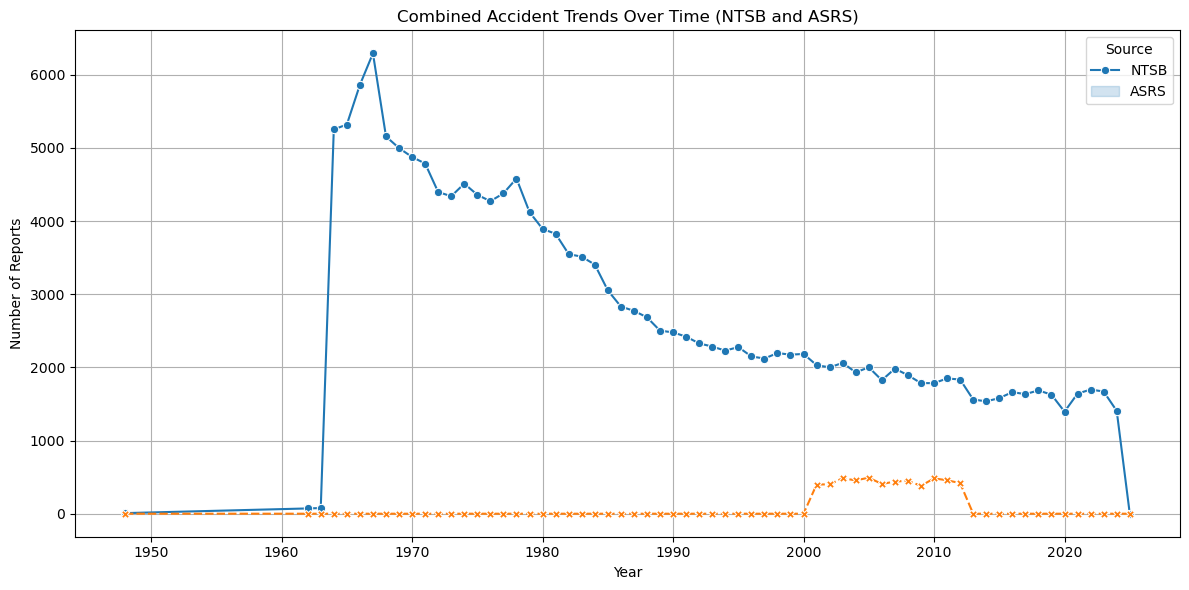

In [17]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed NTSB data
ntsb_data = pd.read_csv('../data/processed/ntsb_data_cleaned.csv', encoding='ISO-8859-1')

# Load the processed ASRS data
asrs_data = pd.read_csv('../data/processed/asrs_data_cleaned.csv', encoding='ISO-8859-1')

# Convert the 'eventdate' (NTSB) and 'date' (ASRS) columns to datetime format
ntsb_data['eventdate'] = pd.to_datetime(ntsb_data['eventdate'], errors='coerce')
asrs_data['date'] = pd.to_datetime(asrs_data['date'], errors='coerce')

# Drop rows with invalid or missing dates
ntsb_data = ntsb_data.dropna(subset=['eventdate'])
asrs_data = asrs_data.dropna(subset=['date'])

# Extract the year from the Date columns
ntsb_data['Year'] = ntsb_data['eventdate'].dt.year
asrs_data['Year'] = asrs_data['date'].dt.year

# Count accidents per year for each dataset
ntsb_trends = ntsb_data['Year'].value_counts().sort_index()
asrs_trends = asrs_data['Year'].value_counts().sort_index()

# Combine the trends into a single DataFrame for comparison
combined_trends = pd.DataFrame({
    'NTSB': ntsb_trends,
    'ASRS': asrs_trends
}).fillna(0)  # Fill missing years with 0

# Plot the combined accident trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_trends, markers=True)
plt.title("Combined Accident Trends Over Time (NTSB and ASRS)")
plt.xlabel("Year")
plt.ylabel("Number of Reports")
plt.grid(True)
plt.legend(title="Source", labels=['NTSB', 'ASRS'])
plt.tight_layout()
plt.show()

C:\Users\Mary\AppData\Local\Temp\ipykernel_13532\1659644972.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_data = pd.read_csv('../data/processed/merged_asrs_ntsb.csv', encoding='ISO-8859-1')


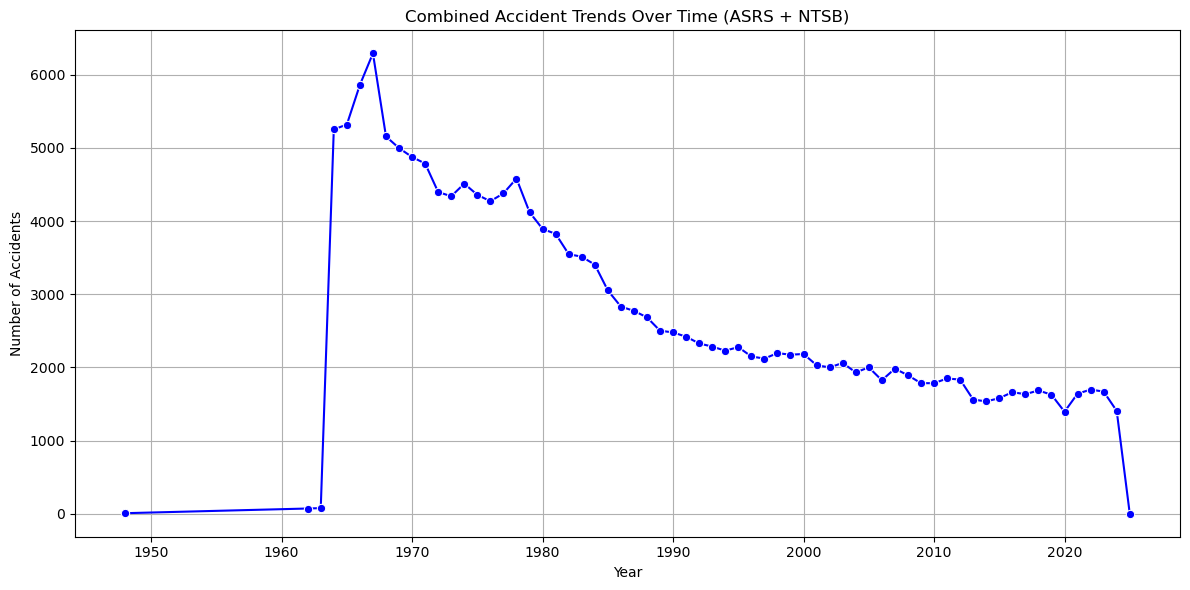

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged dataset
merged_data = pd.read_csv('../data/processed/merged_asrs_ntsb.csv', encoding='ISO-8859-1')

# Convert the 'eventdate' column to datetime format
merged_data['eventdate'] = pd.to_datetime(merged_data['eventdate'], errors='coerce')

# Drop rows with invalid or missing dates
merged_data = merged_data.dropna(subset=['eventdate'])

# Extract the year from the eventdate column
merged_data['Year'] = merged_data['eventdate'].dt.year

# Count accidents per year
accident_trends = merged_data['Year'].value_counts().sort_index()

# Plot the combined accident trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=accident_trends.index, y=accident_trends.values, marker='o', color='b')
plt.title("Combined Accident Trends Over Time (ASRS + NTSB)")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Mary\AppData\Local\Temp\ipykernel_13532\1075593420.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


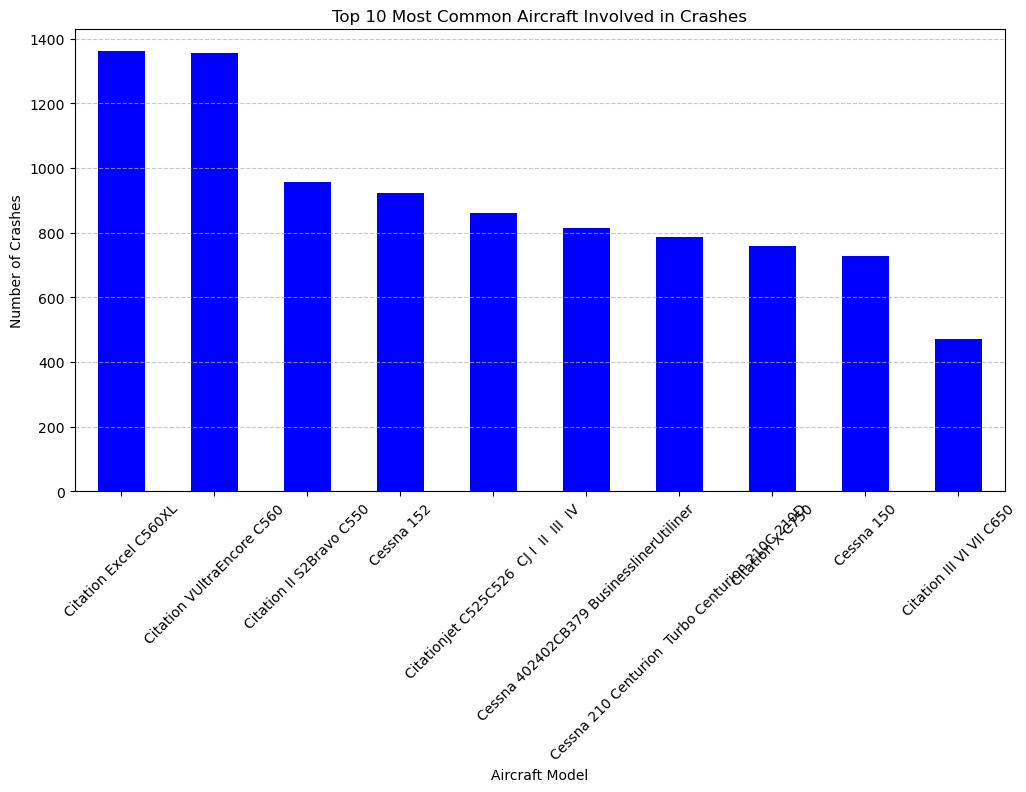

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the merged dataset
file_path = '../data/processed/merged_asrs_ntsb.csv'
df = pd.read_csv(file_path)

# Clean up the data (remove missing aircraft types)
df = df.dropna(subset=['make_model_name'])

# Count the number of crashes for each aircraft type
aircraft_counts = df['make_model_name'].value_counts().head(10)  # Get top 10 aircraft types

# Plotting the bar chart
plt.figure(figsize=(12, 6))
aircraft_counts.plot(kind='bar', color='b')

# Chart details
plt.title('Top 10 Most Common Aircraft Involved in Crashes')
plt.xlabel('Aircraft Model')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.show()

C:\Users\Mary\AppData\Local\Temp\ipykernel_13532\3639068241.py:9: DtypeWarning: Columns (17,29) have mixed types. Specify dtype option on import or set low_memory=False.
  ntsb_df = pd.read_csv(ntsb_file_path)


ASRS Dataset Columns: Index(['', 'Time', 'Time.1', 'Place', 'Place.1', 'Place.2', 'Place.3',
       'Place.4', 'Place.5', 'Place.6',
       ...
       'Events.4', 'Events.5', 'Assessments', 'Assessments.1', 'Report 1',
       'Report 1.1', 'Report 2', 'Report 2.1', 'Report 1.2', 'Unnamed: 125'],
      dtype='object', length=126)
NTSB Dataset Columns: Index(['ntsbno', 'eventtype', 'mkey', 'eventdate', 'city', 'state', 'country',
       'reportno', 'n', 'hassafetyrec', 'reporttype', 'originalpublishdate',
       'highestinjurylevel', 'fatalinjurycount', 'seriousinjurycount',
       'minorinjurycount', 'probablecause', 'eventid', 'latitude', 'longitude',
       'make', 'model', 'aircraftcategory', 'airportid', 'airportname',
       'amateurbuilt', 'numberofengines', 'scheduled', 'purposeofflight',
       'far', 'aircraftdamage', 'weathercondition', 'operator', 'reportstatus',
       'repgenflag', 'docketurl', 'docketpublishdate', 'unnamed:_37'],
      dtype='object')


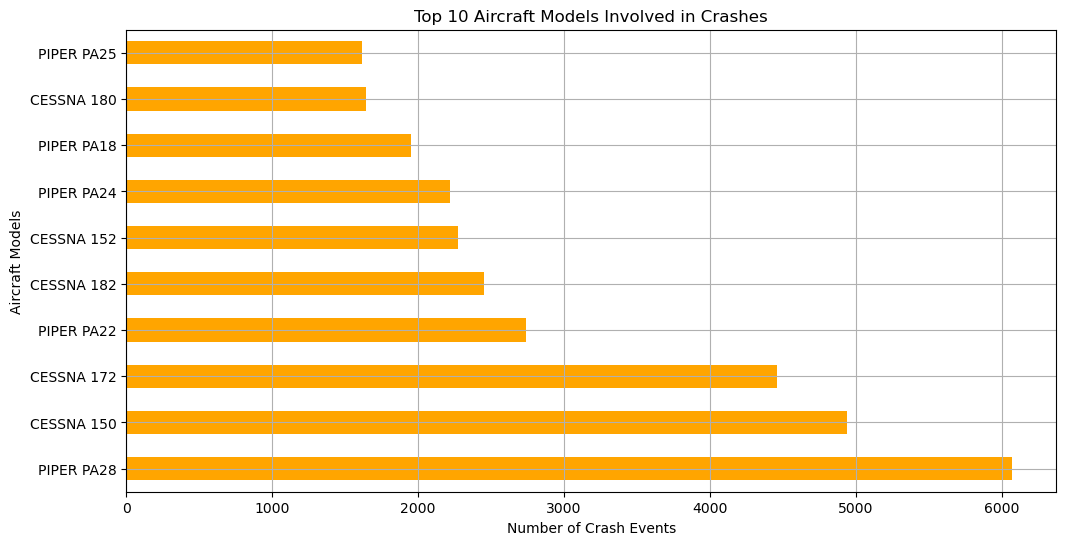

PIPER PA28    6070
CESSNA 150    4939
CESSNA 172    4460
PIPER PA22    2737
CESSNA 182    2450
CESSNA 152    2272
PIPER PA24    2217
PIPER PA18    1953
CESSNA 180    1647
PIPER PA25    1618
Name: count, dtype: int64


In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the ASRS and NTSB datasets
asrs_file_path = '../data/raw/asrs_merged_file.csv'  # Update this with the correct file path
ntsb_file_path = '../data/processed/ntsb_data_cleaned.csv'  # Update this with the correct file path

asrs_df = pd.read_csv(asrs_file_path)
ntsb_df = pd.read_csv(ntsb_file_path)

# Clean column names by removing extra spaces
asrs_df.columns = asrs_df.columns.str.strip()
ntsb_df.columns = ntsb_df.columns.str.strip()

# Step 2: Verify available column names
print("ASRS Dataset Columns:", asrs_df.columns)
print("NTSB Dataset Columns:", ntsb_df.columns)

# Extract relevant columns
try:
    asrs_df = asrs_df[['Time', 'Place', 'Events', 'Assessments']]

    ntsb_df = ntsb_df[['eventdate', 'make', 'model', 'aircraftcategory']]
    # Create a combined column in NTSB dataset for 'make_model'
    ntsb_df['make_model'] = ntsb_df['make'] + ' ' + ntsb_df['model']
except KeyError:
    print("Some expected columns are missing in the datasets.")

# Merge datasets
combined_df = pd.concat([
    asrs_df[['Events']],
    ntsb_df[['make_model']].dropna()
])

# Count the most common aircraft models in crashes
most_common_models = combined_df.apply(lambda row: row['make_model'] if 'make_model' in row else row['Events'], axis=1).value_counts().head(10)

# Visualize results as a horizontal bar chart
plt.figure(figsize=(12, 6))
most_common_models.plot(kind='barh', color='orange')
plt.title('Top 10 Aircraft Models Involved in Crashes')
plt.xlabel('Number of Crash Events')
plt.ylabel('Aircraft Models')
plt.grid(True)

# Show the plot
plt.show()

print(most_common_models)


C:\Users\Mary\AppData\Local\Temp\ipykernel_13532\3178566769.py:10: DtypeWarning: Columns (17,29) have mixed types. Specify dtype option on import or set low_memory=False.
  ntsb_df = pd.read_csv(ntsb_file_path)


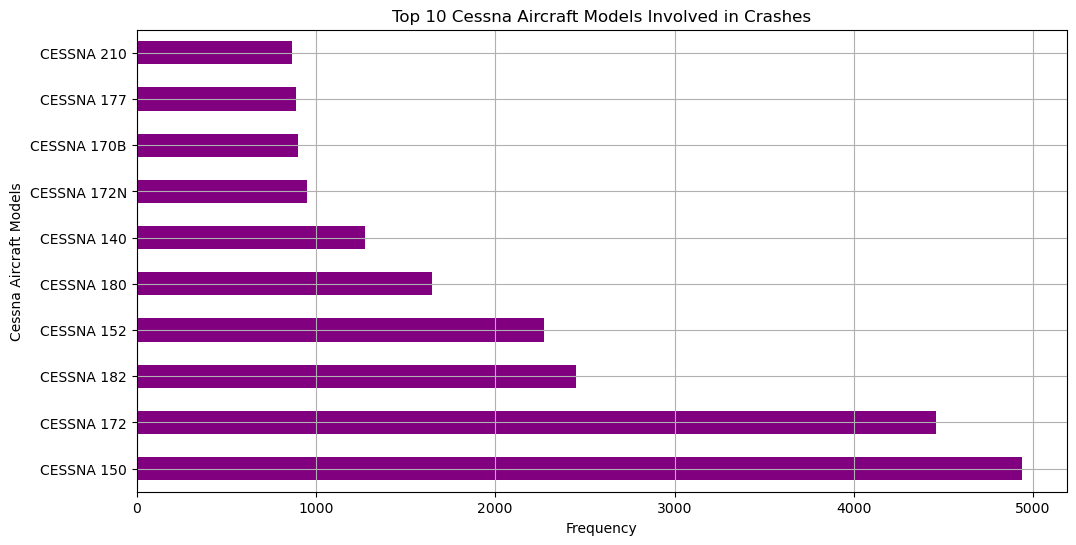

CESSNA 150     4939
CESSNA 172     4460
CESSNA 182     2450
CESSNA 152     2272
CESSNA 180     1647
CESSNA 140     1274
CESSNA 172N     952
CESSNA 170B     900
CESSNA 177      892
CESSNA 210      867
Name: count, dtype: int64


In [35]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the ASRS and NTSB datasets
asrs_file_path = '../data/raw/asrs_merged_file.csv'  # Update this with the correct file path
ntsb_file_path = '../data/processed/ntsb_data_cleaned.csv'  # Update this with the correct file path

asrs_df = pd.read_csv(asrs_file_path)
ntsb_df = pd.read_csv(ntsb_file_path)

# Clean column names
asrs_df.columns = asrs_df.columns.str.strip()
ntsb_df.columns = ntsb_df.columns.str.strip()

# Extract relevant columns
try:
    asrs_df = asrs_df[['Time', 'Place', 'Events', 'Assessments']]

    ntsb_df = ntsb_df[['eventdate', 'make', 'model', 'aircraftcategory']]
    ntsb_df['make_model'] = ntsb_df['make'] + ' ' + ntsb_df['model']

except KeyError:
    print("Some expected columns are missing in the datasets.")

# Filter dataset to include only Cessna aircraft
cessna_df = ntsb_df[ntsb_df['make'].str.contains('Cessna', case=False, na=False)]

# Merge relevant data
combined_df = pd.concat([
    asrs_df[['Events']],
    cessna_df[['make_model']].dropna()
])

# Count top models by frequency
top_10_cessna_models = combined_df.apply(lambda row: row['make_model'] if 'make_model' in row else row['Events'], axis=1).value_counts().head(10)

# Visualize with a horizontal bar chart
plt.figure(figsize=(12, 6))
top_10_cessna_models.plot(kind='barh', color='purple')
plt.title('Top 10 Cessna Aircraft Models Involved in Crashes')
plt.xlabel('Frequency')
plt.ylabel('Cessna Aircraft Models')
plt.grid(True)

# Display the plot
plt.show()

print(top_10_cessna_models)


C:\Users\Mary\AppData\Local\Temp\ipykernel_13532\4044668705.py:10: DtypeWarning: Columns (17,29) have mixed types. Specify dtype option on import or set low_memory=False.
  ntsb_df = pd.read_csv(ntsb_file_path)


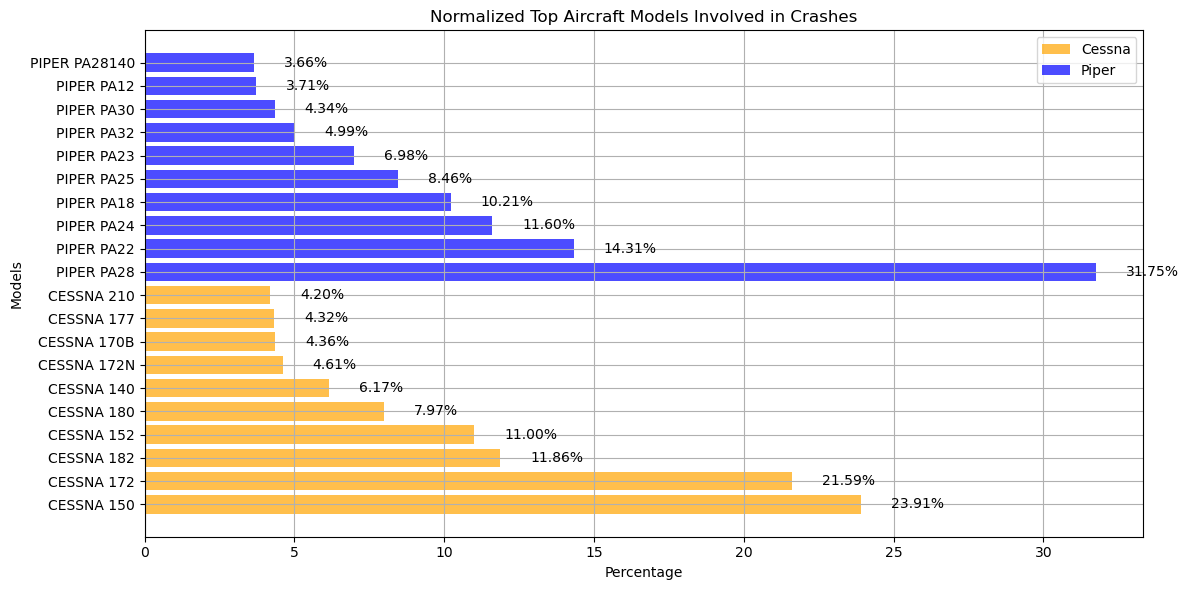

In [41]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
asrs_file_path = '../data/raw/asrs_merged_file.csv'  # Update this with the correct file path
ntsb_file_path = '../data/processed/ntsb_data_cleaned.csv'  # Update this with the correct file path

asrs_df = pd.read_csv(asrs_file_path)
ntsb_df = pd.read_csv(ntsb_file_path)

# Clean column names (remove leading and trailing spaces)
asrs_df.columns = asrs_df.columns.str.strip()
ntsb_df.columns = ntsb_df.columns.str.strip()

# Extract relevant columns
try:
    ntsb_df['make_model'] = ntsb_df['make'] + ' ' + ntsb_df['model']
except KeyError:
    print("Columns make or model are missing in the dataset.")

# Filter dataset to include only Cessna and Piper aircraft
cessna_df = ntsb_df[ntsb_df['make'].str.contains('Cessna', case=False, na=False)]
piper_df = ntsb_df[ntsb_df['make'].str.contains('Piper', case=False, na=False)]

# Count models for Cessna and Piper
cessna_counts = cessna_df['make_model'].value_counts().head(10)
piper_counts = piper_df['make_model'].value_counts().head(10)

# Normalize counts to percentages
total_cessna = cessna_counts.sum()
normalized_cessna = (cessna_counts / total_cessna) * 100

total_piper = piper_counts.sum()
normalized_piper = (piper_counts / total_piper) * 100

# Visualize with a horizontal bar plot
plt.figure(figsize=(12, 6))

# Plot Cessna bars
plt.barh(list(normalized_cessna.index), normalized_cessna.values, color='orange', alpha=0.7, label='Cessna')
# Plot Piper bars
plt.barh(list(normalized_piper.index), normalized_piper.values, color='blue', alpha=0.7, label='Piper')

# Add percentage annotations to bars
for index, value in enumerate(normalized_cessna.values):
    plt.text(value + 1, index, f'{value:.2f}%', va="center", fontsize=10, color='black')

for index, value in enumerate(normalized_piper.values):
    plt.text(value + 1, index + len(normalized_cessna), f'{value:.2f}%', va="center", fontsize=10, color='black')

plt.title('Normalized Top Aircraft Models Involved in Crashes')
plt.xlabel('Percentage')
plt.ylabel('Models')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()

plt.show()


In [43]:
print(f"{normalized_cessna}")
print(f"{normalized_piper}")

make_model
CESSNA 150     23.914201
CESSNA 172     21.594926
CESSNA 182     11.862683
CESSNA 152     11.000823
CESSNA 180      7.974628
CESSNA 140      6.168595
CESSNA 172N     4.609500
CESSNA 170B     4.357720
CESSNA 177      4.318985
CESSNA 210      4.197937
Name: count, dtype: float64
make_model
PIPER PA28       31.746862
PIPER PA22       14.314854
PIPER PA24       11.595188
PIPER PA18       10.214435
PIPER PA25        8.462343
PIPER PA23        6.976987
PIPER PA32        4.989540
PIPER PA30        4.335774
PIPER PA12        3.708159
PIPER PA28140     3.655858
Name: count, dtype: float64


C:\Users\Mary\AppData\Local\Temp\ipykernel_13532\2039368733.py:10: DtypeWarning: Columns (17,29) have mixed types. Specify dtype option on import or set low_memory=False.
  ntsb_data = pd.read_csv(ntsb_file_path)
C:\Users\Mary\AppData\Local\Temp\ipykernel_13532\2039368733.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cessna_data['CauseCategory'] = cessna_data['probablecause'].apply(categorize_cause)


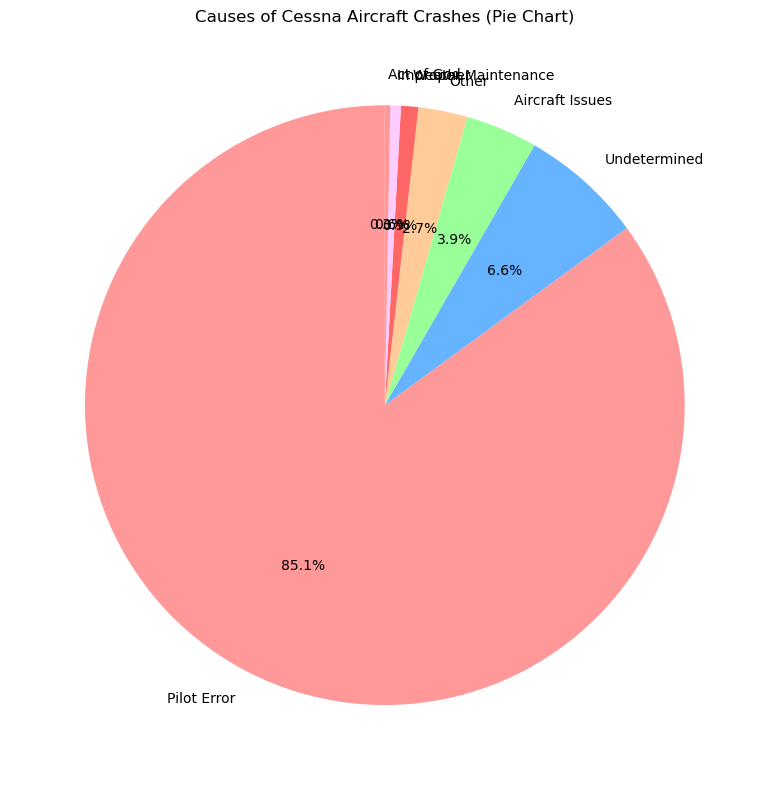

C:\Users\Mary\AppData\Local\Temp\ipykernel_13532\2039368733.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = (cause_category_percent[i])
C:\Users\Mary\AppData\Local\Temp\ipykernel_13532\2039368733.py:82: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, cause_category_percent[i] + 0.5, f'{percentage:.1f}%', ha='center', va='bottom')


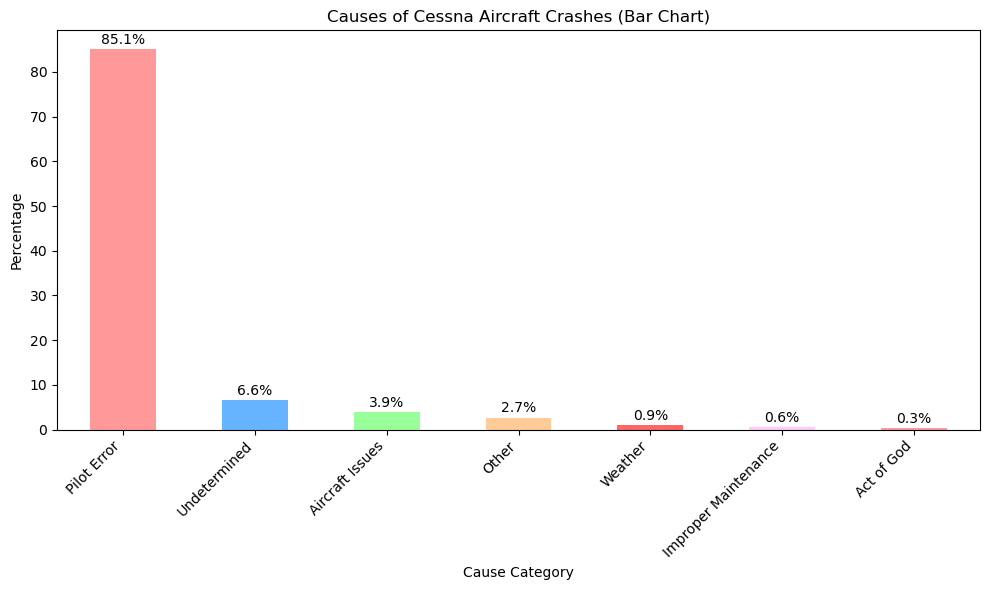


Crash Causes Percentage Breakdown:
Pilot Error: 85.06%
Undetermined: 6.63%
Aircraft Issues: 3.87%
Other: 2.65%
Weather: 0.93%
Improper Maintenance: 0.56%
Act of God: 0.29%


In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load datasets
asrs_file_path = '../data/raw/asrs_merged_file.csv'  
ntsb_file_path = '../data/processed/ntsb_data_cleaned.csv'

# Load the datasets
asrs_data = pd.read_csv(asrs_file_path)
ntsb_data = pd.read_csv(ntsb_file_path)

# Step 2: Filter only Cessna aircraft from the NTSB dataset
cessna_data = ntsb_data[ntsb_data['make'].str.contains('Cessna', case=False, na=False)]

# Step 3: Categorize causes of crashes
def categorize_cause(cause):
    pilot_error_keywords = [
        'pilot', 'human error', 'misjudgment', 'inexperience', 'suicide', 'person', 'error',
        'untrained', 'unqualified', 'failure to', 'lost control', 'disorientation',
        'improper handling', 'inattention', 'overloaded', 'poor judgment', 'failure to maintain control'
    ]
    aircraft_keywords = [
        'mechanical failure', 'engine failure', 'fuel exhaustion', 'landing gear failure',
        'bird strike', 'engine', 'collapse', 'leak', 'system failure', 'flap failure',
        'brake failure', 'electrical failure', 'fuel leak', 'malfunction', 'worn parts'
    ]
    weather_keywords = [
        'weather', 'turbulence', 'fog', 'thunderstorm', 'wind', 'hail', 'lightning',
        'rain', 'freezing', 'blizzard', 'icing', 'visibility', 'clouds', 'snow'
    ]
    maintenance_keywords = [
        'maintenance', 'service', 'repair', 'inspection', 'deficient maintenance',
        'improper servicing', 'failure to inspect', 'maintenance oversight', 'poor maintenance'
    ]
    undetermined_keywords = ['undetermined', 'unknown', 'no cause', 'none identified']
    act_of_god_keywords = [
        'bird', 'deer', 'animal', 'volcanic eruption', 'earthquake', 'tornado', 'flood'
    ]
    
    cause = str(cause).lower()

    if any(keyword in cause for keyword in pilot_error_keywords):
        return 'Pilot Error'
    elif any(keyword in cause for keyword in aircraft_keywords):
        return 'Aircraft Issues'
    elif any(keyword in cause for keyword in weather_keywords):
        return 'Weather'
    elif any(keyword in cause for keyword in undetermined_keywords):
        return 'Undetermined' 
    elif any(keyword in cause for keyword in maintenance_keywords):
        return 'Improper Maintenance'
    elif any(keyword in cause for keyword in act_of_god_keywords):
        return 'Act of God'    
    else:
        return 'Other'

# Apply the categorization to the Probable Cause column
cessna_data['CauseCategory'] = cessna_data['probablecause'].apply(categorize_cause)

# Step 4: Count the number of occurrences in each category
cause_category_counts = cessna_data['CauseCategory'].value_counts()

# Normalize percentages
total_crashes = cause_category_counts.sum()
cause_category_percent = (cause_category_counts / total_crashes) * 100

# Step 5: Plot the pie chart
plt.figure(figsize=(8, 8))
cause_category_percent.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff6666', '#ffccff'])
plt.title("Causes of Cessna Aircraft Crashes (Pie Chart)")
plt.ylabel('')
plt.tight_layout()
plt.show()

# Step 6: Plot the bar chart with percentages on top of each bar
plt.figure(figsize=(10, 6))
ax = cause_category_percent.plot(kind='bar', color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff6666', '#ffccff'])

# Adding percentages on top of each bar
for i in range(len(cause_category_percent)):
    percentage = (cause_category_percent[i])
    ax.text(i, cause_category_percent[i] + 0.5, f'{percentage:.1f}%', ha='center', va='bottom')

plt.title("Causes of Cessna Aircraft Crashes (Bar Chart)")
plt.xlabel('Cause Category')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plots
plt.show()

# Print the percentages for each cause category
print("\nCrash Causes Percentage Breakdown:")
for cause, percentage in cause_category_percent.items():
    print(f"{cause}: {percentage:.2f}%")

Shapefile path '../data/maps' exists.
Shapefile loaded successfully!
        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United St

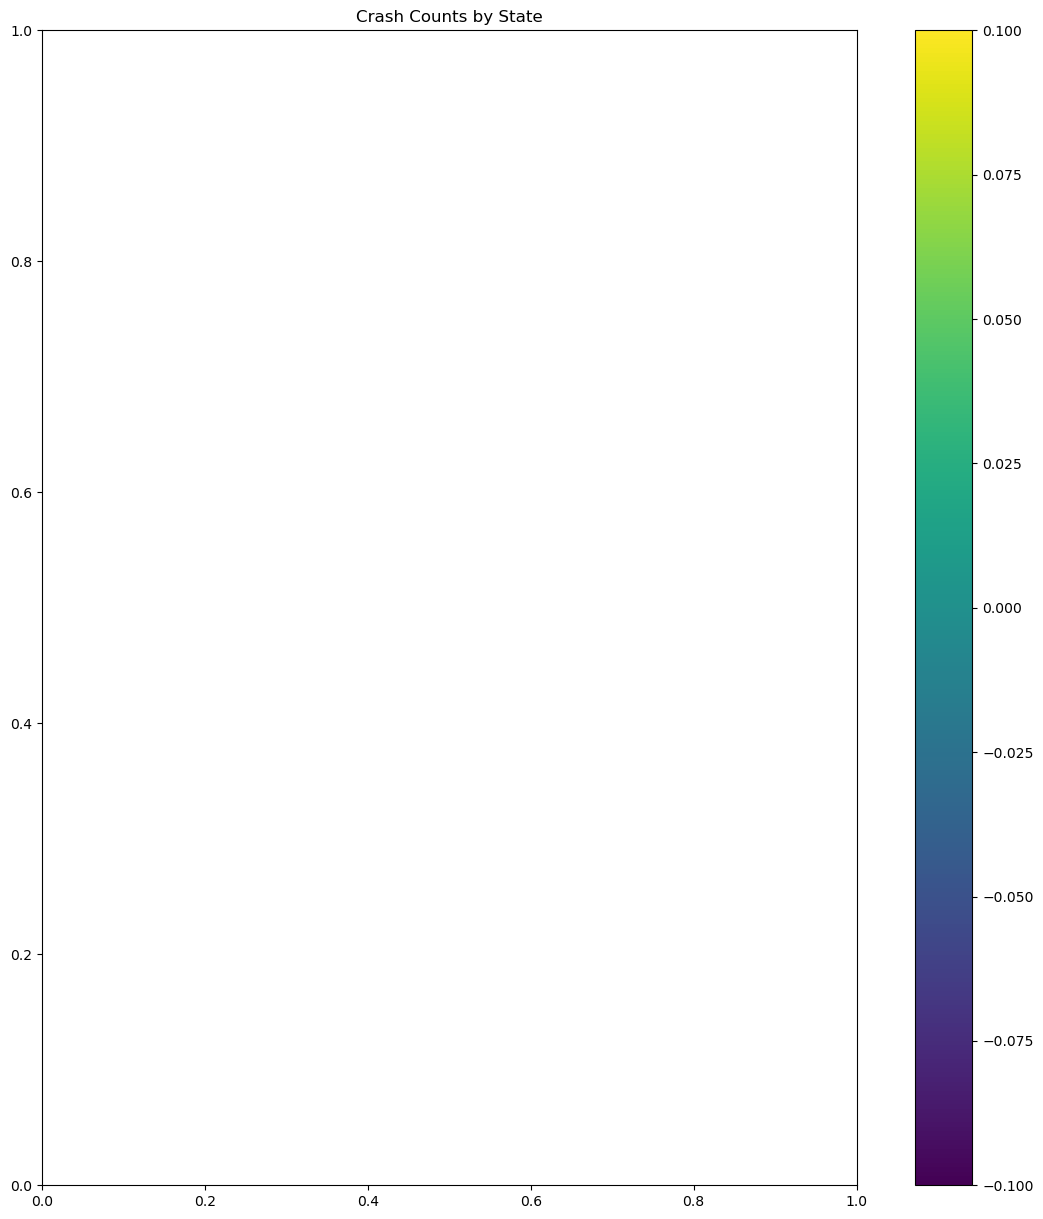

In [155]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load data
shapefile_path = '../data/maps'  # Adjust this path as necessary
asrs_data = pd.read_csv('../data/raw/asrs_merged_file.csv', low_memory=False)
ntsb_data = pd.read_csv('../data/processed/ntsb_data_cleaned.csv', low_memory=False)
us = gpd.read_file(f'{shapefile_path}/ne_110m_admin_0_countries.shp')

# Step 2: Verify the shapefile
print(f"Shapefile path '{shapefile_path}' exists.")
print("Shapefile loaded successfully!")
print(us.head())

# Step 3: Check unique entries in the 'ADMIN' column
print("Unique values in 'ADMIN':")
print(us['ADMIN'].unique())

# Step 4: Filter for United States geometries
if "United States of America" in us['ADMIN'].values:
    us = us[us['ADMIN'] == "United States of America"]
else:
    print("United States not found in 'ADMIN' column!")
    exit()

# Step 5: Standardize state names in crash data
state_abbreviations = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA",
    "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE", "Florida": "FL", "Georgia": "GA",
    "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL", "Indiana": "IN", "Iowa": "IA",
    "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD",
    "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS",
    "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH",
    "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY", "North Carolina": "NC",
    "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA",
    "Rhode Island": "RI", "South Carolina": "SC", "South Dakota": "SD", "Tennessee": "TN",
    "Texas": "TX", "Utah": "UT", "Vermont": "VT", "Virginia": "VA", "Washington": "WA",
    "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
}

# Reverse the dictionary for abbreviation lookup
abbr_to_full = {v: k for k, v in state_abbreviations.items()}

# Sample crash data (replace this with the real data from asrs_data or ntsb_data)
aggregated_crashes = pd.DataFrame({
    'state': ['AL', 'AK', 'AZ', 'AR', 'CA'],  # Assume abbreviations in one dataset
    'total_crashes': [2584, 10150, 5374, 3243, 157]
})

# Convert abbreviations to full state names
aggregated_crashes['state'] = aggregated_crashes['state'].map(abbr_to_full)
print(aggregated_crashes)

# Step 6: Prepare the GeoDataFrame for merging
# Match the state names with those in the crash data
us['state'] = us['ADMIN']
merged_data = us.merge(aggregated_crashes, on='state', how='left')

# Fill NaN values for 'total_crashes'
merged_data['total_crashes'] = merged_data['total_crashes'].fillna(0)

# Replace 0s with NaN for better colormap rendering
merged_data['total_crashes'] = merged_data['total_crashes'].replace(0, np.nan)

# Step 7: Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Plot GeoDataFrame with crash data
merged_data.plot(ax=ax, column='total_crashes', cmap='viridis', legend=True)

plt.title('Crash Counts by State')
plt.show()
